In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

import joblib

In [2]:
df=pd.read_csv('customer retention-2.csv',encoding= 'unicode_escape')
pd.set_option('display.max_columns',None)

In [3]:
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the Bag, Shopping Cart?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you 

In [4]:
df["Which of the Indian online retailer would you recommend to a friend?"].value_counts()

Amazon.in                                            79
Amazon.in, Flipkart.com                              62
Flipkart.com                                         38
Amazon.in, Myntra.com                                30
Amazon.in, Paytm.com, Myntra.com                     20
Amazon.in, Flipkart.com, Myntra.com                  15
Amazon.in, Paytm.com                                 13
Flipkart.com, Paytm.com, Myntra.com, snapdeal.com    11
Name: Which of the Indian online retailer would you recommend to a friend?, dtype: int64

In [5]:
df["Longer time to get logged in (promotion, sales period)"].value_counts() 

Amazon.in                                56
Amazon.in, Flipkart.com                  38
Paytm.com                                38
Myntra.com                               35
Amazon.in, Flipkart.com, Snapdeal.com    29
Snapdeal.com                             25
Flipkart.com, Paytm.com                  15
Flipkart.com, Paytm.com, Snapdeal.com    13
Amazon.in, Paytm.com                     11
Flipkart.com                              8
Name: Longer time to get logged in (promotion, sales period), dtype: int64

In [6]:
df["3 Which city do you shop online from?"].value_counts() 

Delhi            57
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Ghaziabad        18
Solan            18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: 3 Which city do you shop online from?, dtype: int64

In [7]:
df['1Gender of respondent'].value_counts() 

1    180
0     88
Name: 1Gender of respondent, dtype: int64

In [8]:
df['47 Getting value for money spent'].value_counts() 

4    149
5     81
3     38
Name: 47 Getting value for money spent, dtype: int64

In [9]:
df['From the following, tick any (or all) of the online retailers you have shopped from                                                                    '].value_counts() 

Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    82
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in, Flipkart.com                                         32
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                29
Amazon.in, Flipkart.com, Snapdeal.com                           27
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in                                                       16
Amazon.in, Paytm.com                                            11
Amazon.in, Flipkart.com, Paytm.com                               7
Name: From the following, tick any (or all) of the online retailers you have shopped from                                                                    , dtype: int64

In [10]:
df['Easy to use website or application'].value_counts()

Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    64
Amazon.in, Flipkart.com                                         44
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in                                                       29
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                22
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Flipkart.com, Myntra.com                             19
Paytm.com                                                       11
Flipkart.com                                                     8
Amazon.in, Paytm.com                                             7
Name: Easy to use website or application, dtype: int64

# Target

In [11]:
df['1Gender of respondent'].value_counts() 

1    180
0     88
Name: 1Gender of respondent, dtype: int64

# Feature Engineering

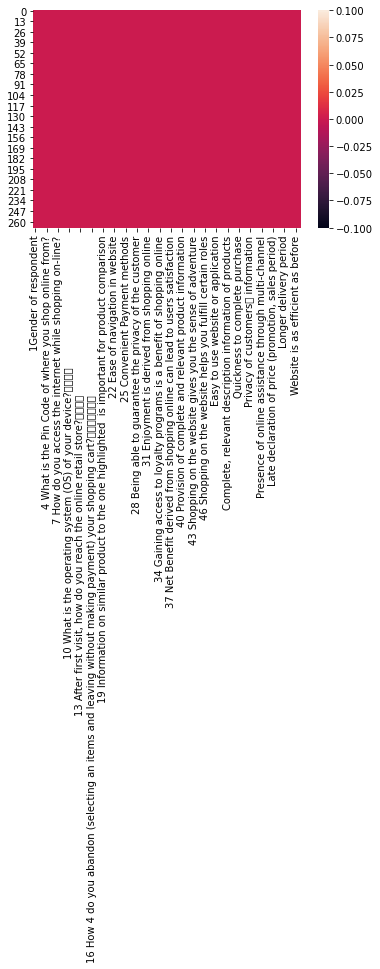

In [12]:
sns.heatmap(df.isnull())#no missing value in the dataset.
#But there are '?' signs which are actually missing values which are not detected as missing values by the system.

# EDA by sweetviz library

In [13]:
#df['1Gender of respondent']=df['1Gender of respondent'].replace(['',''],[0,1])
#target feature must be numerical to apply sweetviz library

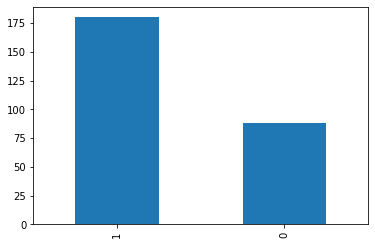

In [14]:
df['1Gender of respondent'].value_counts().plot.bar()#imbalance data.
#We will apply data balancinging technique here.
#Later in  we start the model building part right after the EDA by Sweetviz process with the Gender factor as the target value.

In [15]:
import sweetviz    
#Due to multiclass classification problem here sweetviz library is giving error even after label encodeing(.replace()here).
#this is yet to be worked out by the developers.

In [16]:
my_report=sweetviz.analyze([df,'df'],target_feat='1Gender of respondent')

:FEATURES DONE:                    |█████████████████████| [100%]   00:25  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:03  -> (00:00 left)


Creating Associations graph... DONE!


In [17]:
my_report.show_html('Target gender.html')

Report Target gender.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [18]:
for i in df.columns:
    if df[i].nunique()>=1:
        print(i,df[i].nunique())
    

1Gender of respondent 2
2 How old are you?  5
3 Which city do you shop online from? 11
4 What is the Pin Code of where you shop online from? 39
5 Since How Long You are Shopping Online ? 5
6 How many times you have made an online purchase in the past 1 year? 5
7 How do you access the internet while shopping on-line? 4
8 Which device do you use to access the online shopping? 4
9 What is the screen size of your mobile device?						                                         3
10 What is the operating system (OS) of your device?				                                           3
11 What browser do you run on your device to access the website?			                                                           4
12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                    3
13 After first visit, how do you reach the online retail store?				                                                    4
14 How much t

In [19]:
df.dtypes

1Gender of respondent                                                    int64
2 How old are you?                                                       int64
3 Which city do you shop online from?                                   object
4 What is the Pin Code of where you shop online from?                    int64
5 Since How Long You are Shopping Online ?                               int64
                                                                         ...  
Longer delivery period                                                  object
Change in website/Application design                                    object
Frequent disruption when moving from one page to another                object
Website is as efficient as before                                       object
Which of the Indian online retailer would you recommend to a friend?    object
Length: 71, dtype: object

In [20]:
df.describe()

,1Gender of respondent,2 How old are you?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the Bag, Shopping Cart?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,0.671642,2.958955,220877.899254,3.518657,2.667910,3.257463,1.671642,4.279851,1.779851,1.276119,1.361940,2.552239,3.925373,1.776119,2.884328,2.682836,4.384328,4.141791,3.876866,4.108209,4.287313,4.126866,4.402985,4.376866,4.264925,4.462687,4.593284,4.376866,3.925373,3.574627,4.339552,4.597015,3.955224,4.291045,4.589552,4.380597,4.179104,4.152985,4.354478,4.272388,3.917910,3.552239,3.220149,3.496269,3.279851,4.160448
std,0.470495,1.068003,140624.263849,1.436426,1.652876,1.137108,0.841580,0.924107,0.797964,0.646417,0.899213,1.263531,1.196918,1.078505,1.030280,1.346435,1.048298,0.917193,1.068684,1.084211,1.061

# EDA

# checking relation of each attribute w.r.t target attribute

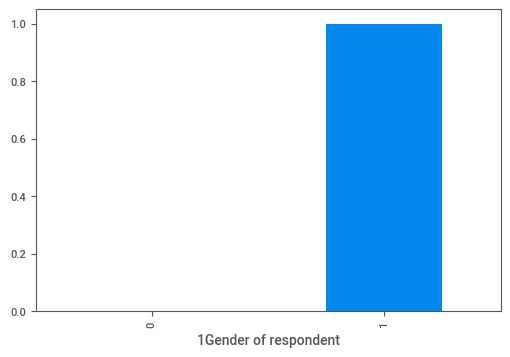

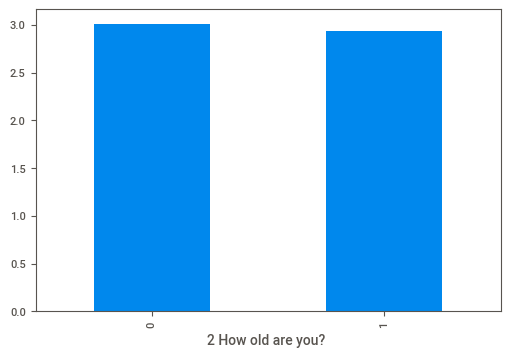

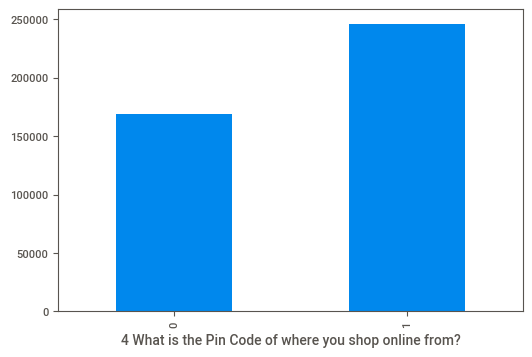

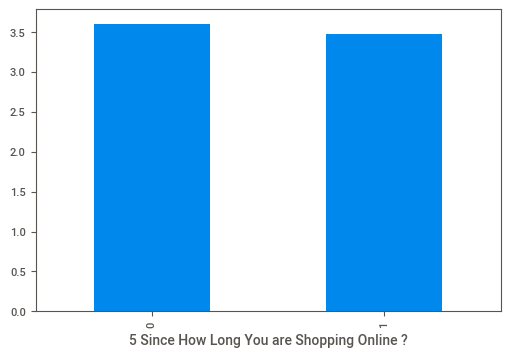

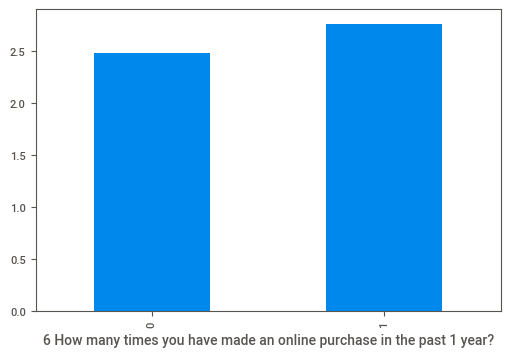

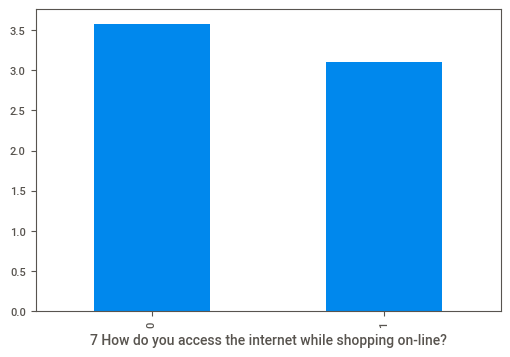

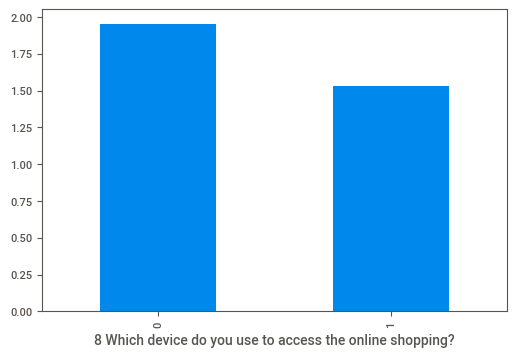

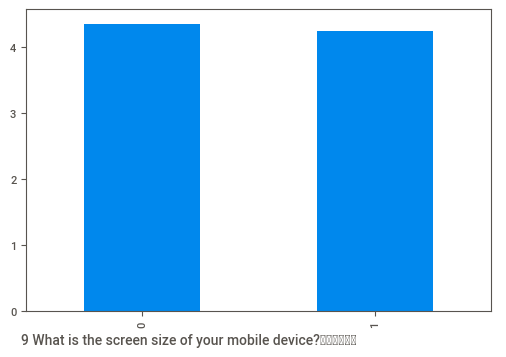

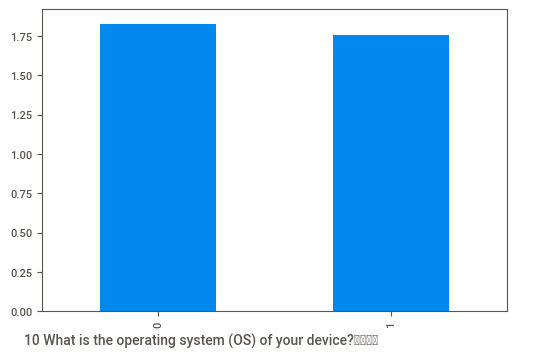

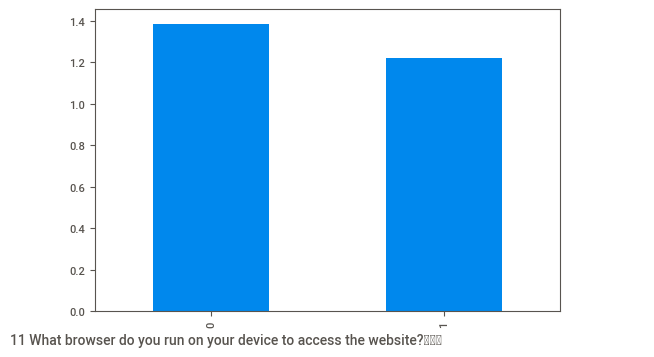

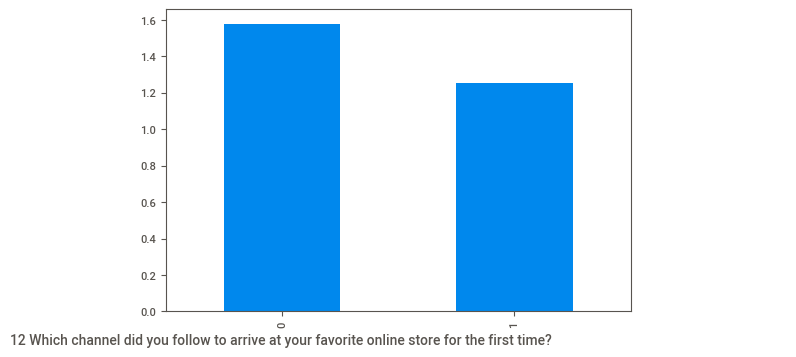

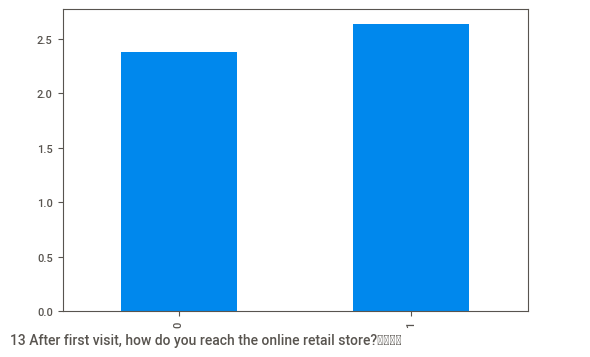

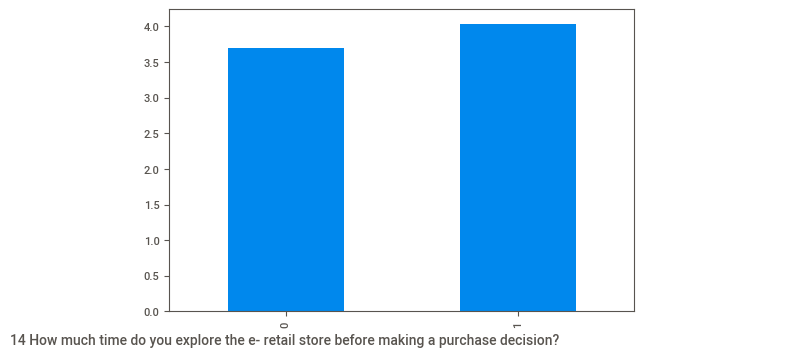

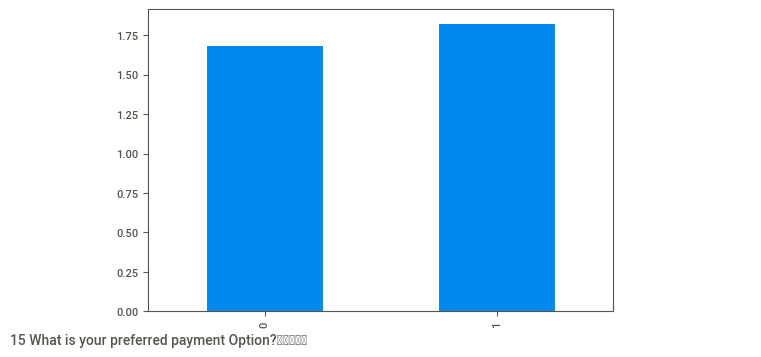

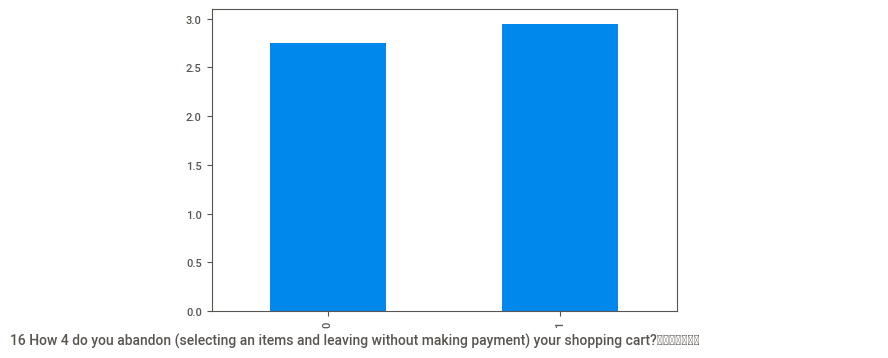

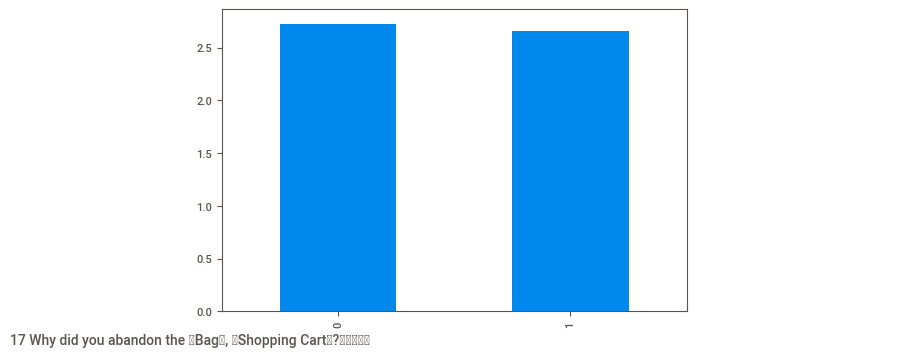

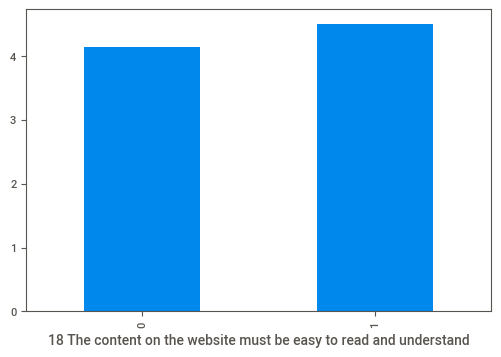

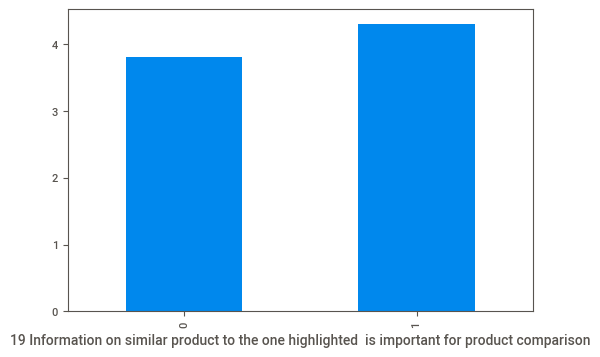

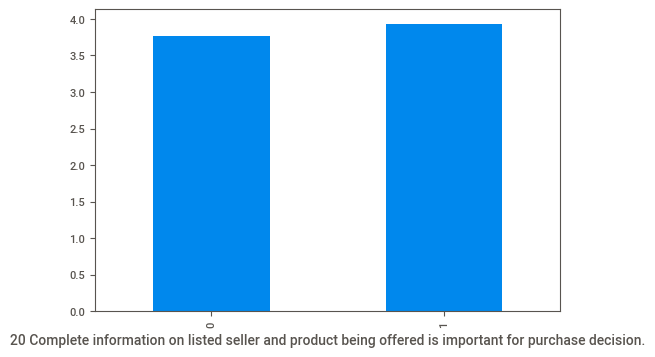

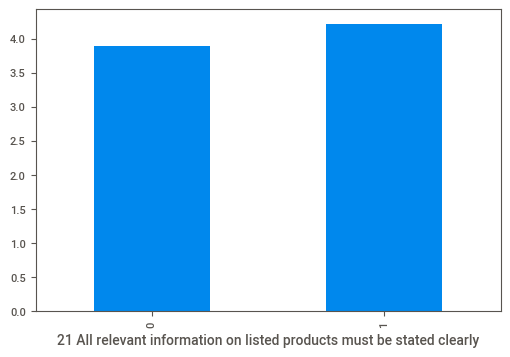

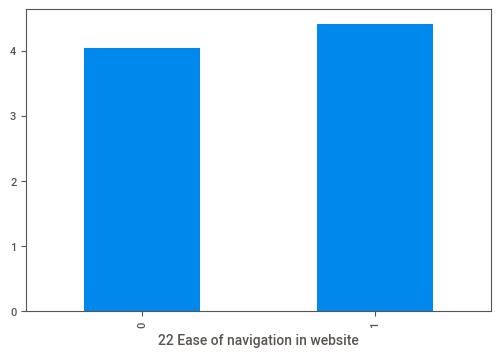

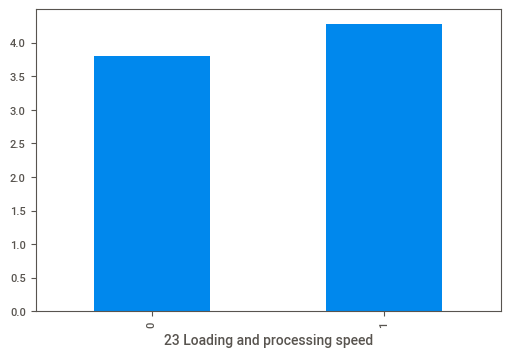

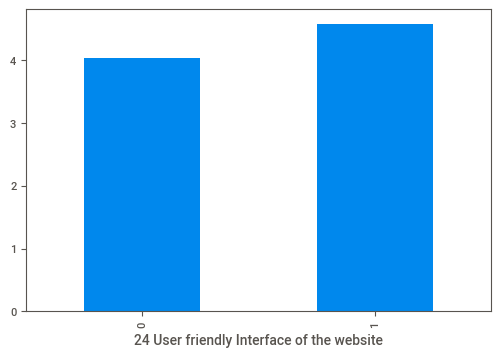

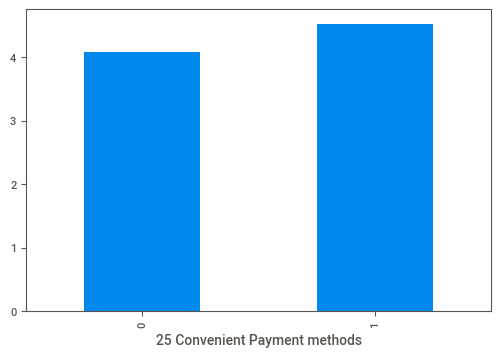

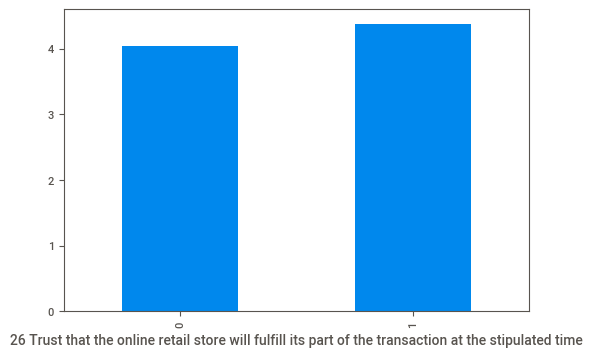

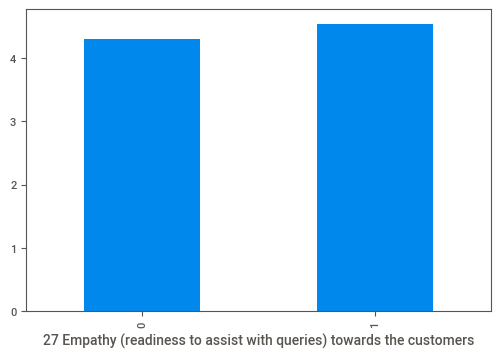

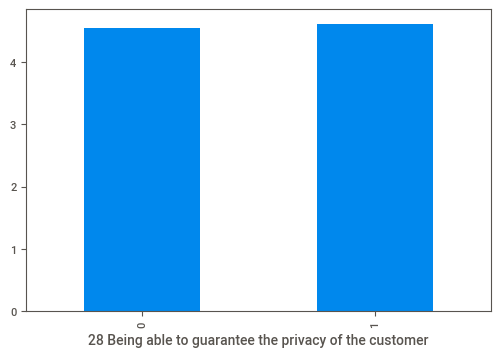

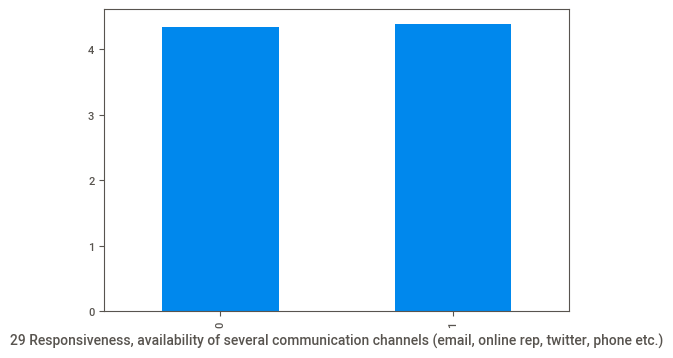

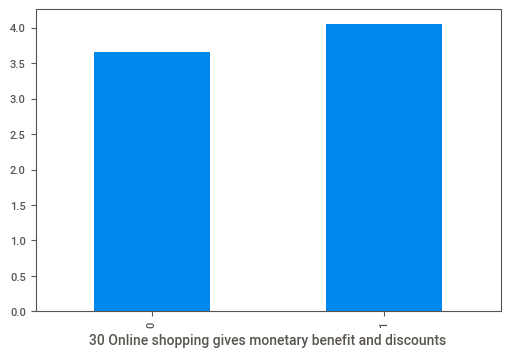

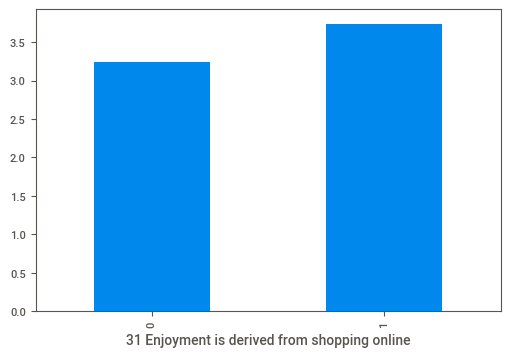

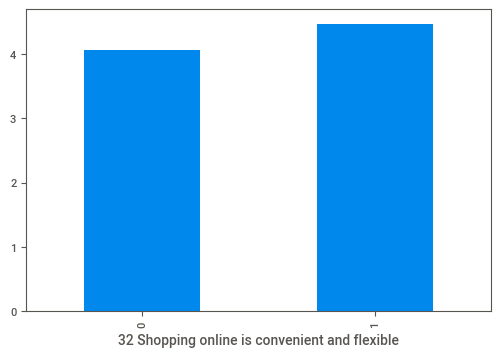

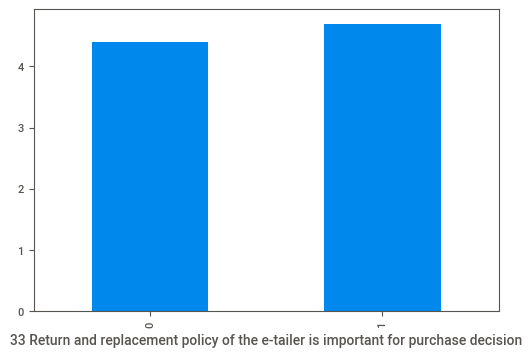

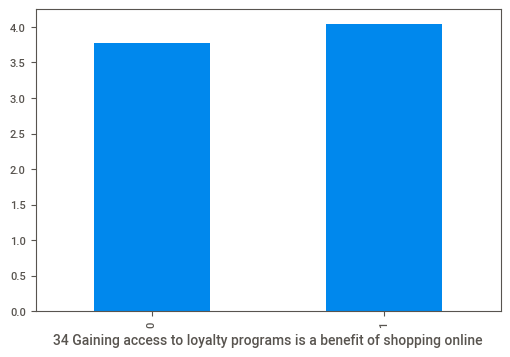

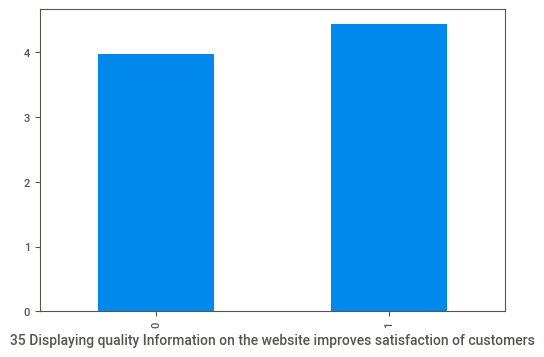

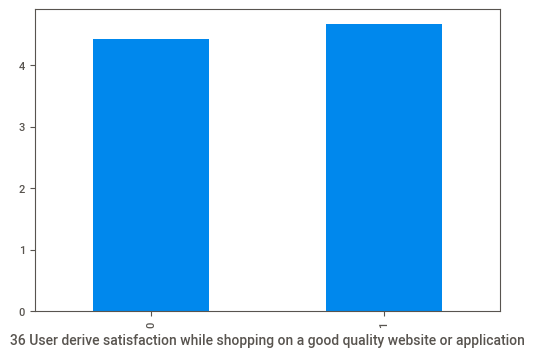

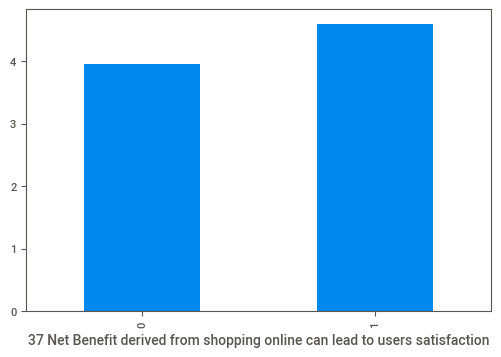

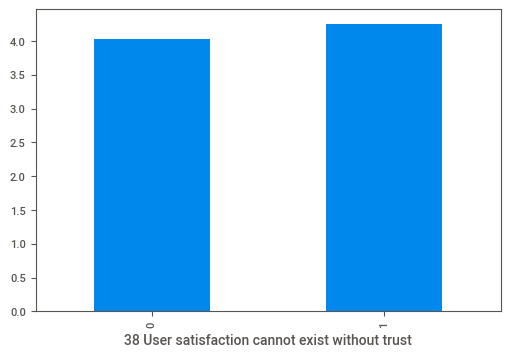

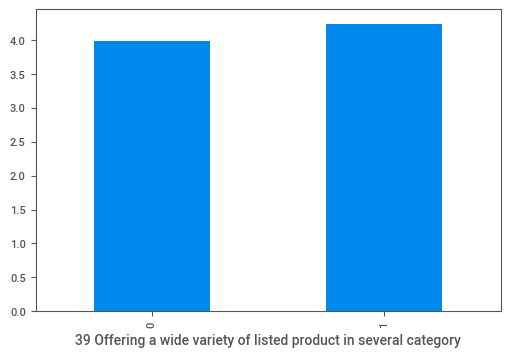

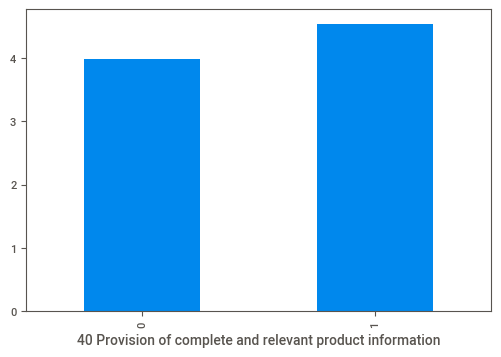

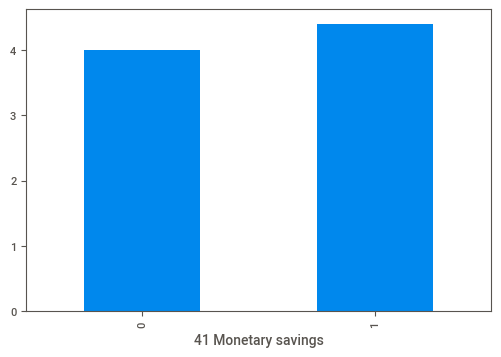

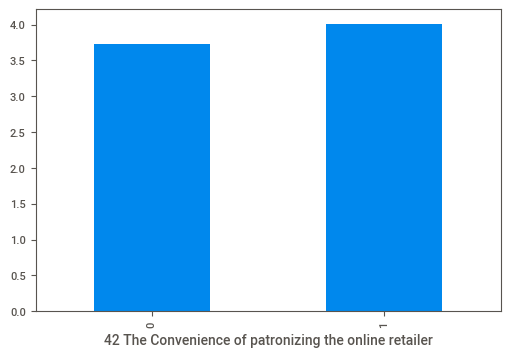

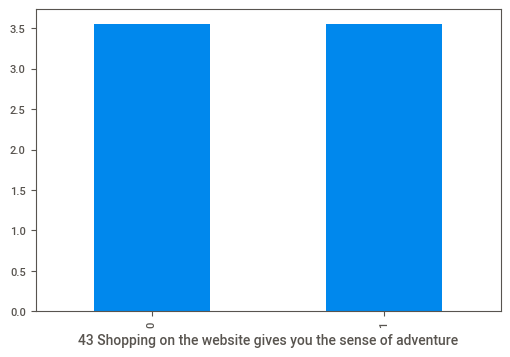

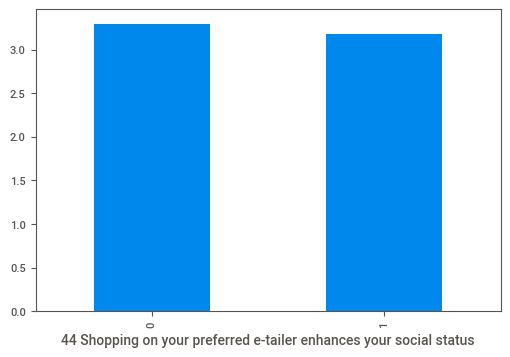

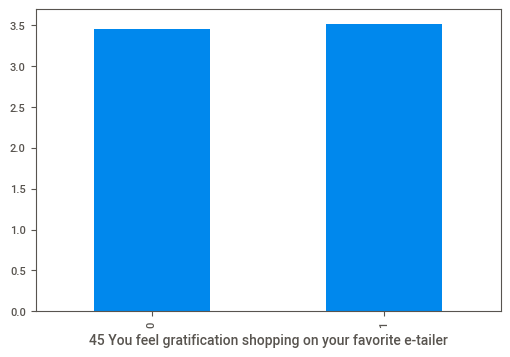

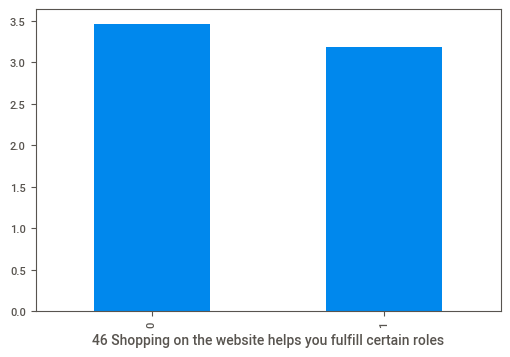

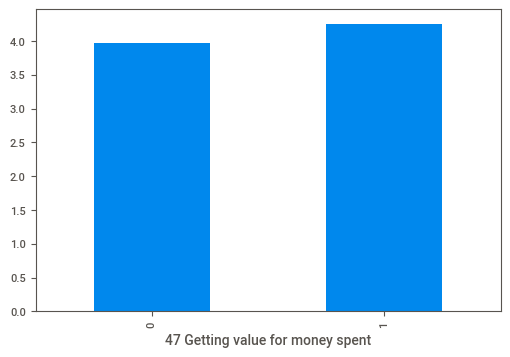

In [21]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    if feature==0:
        pass
    else:
    
        df.groupby('1Gender of respondent')[feature].mean().plot.bar()
        plt.xlabel(feature)
        plt.show()


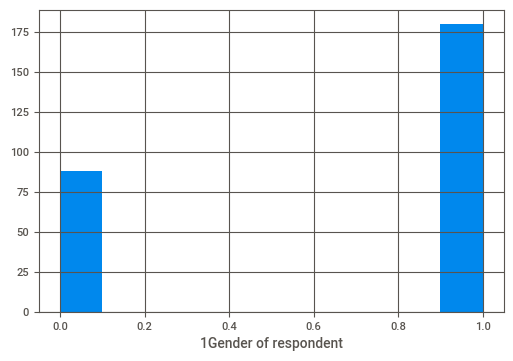

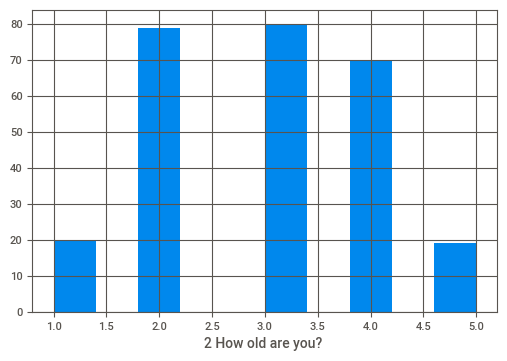

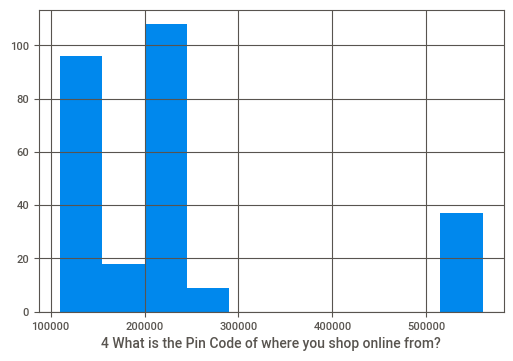

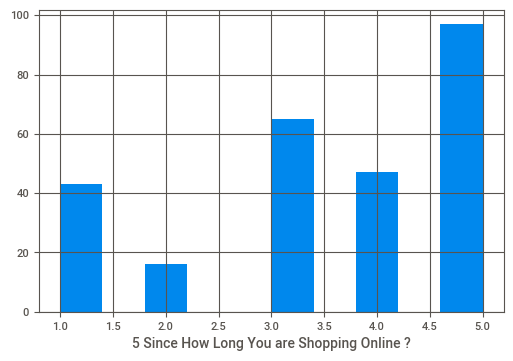

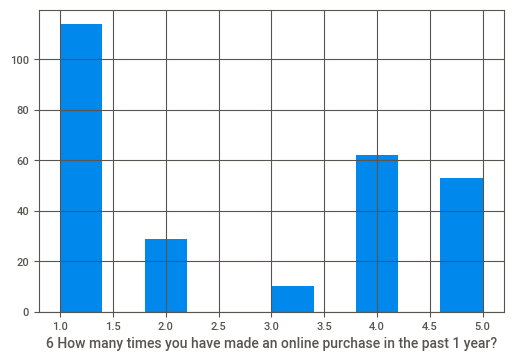

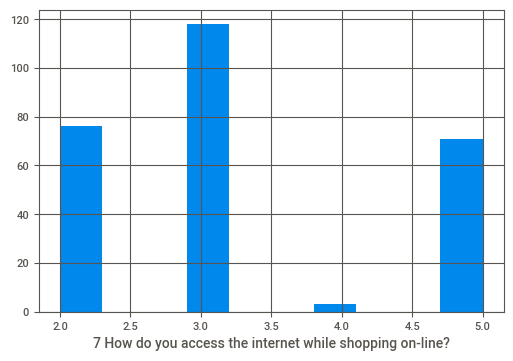

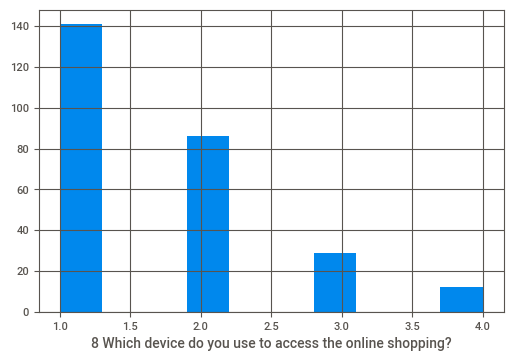

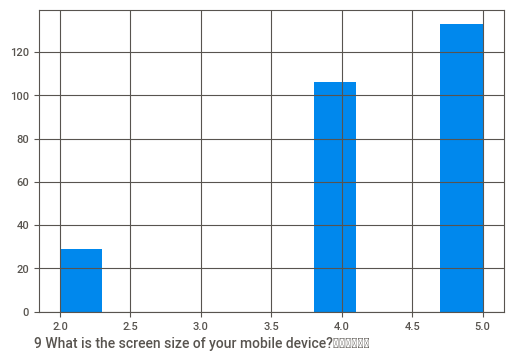

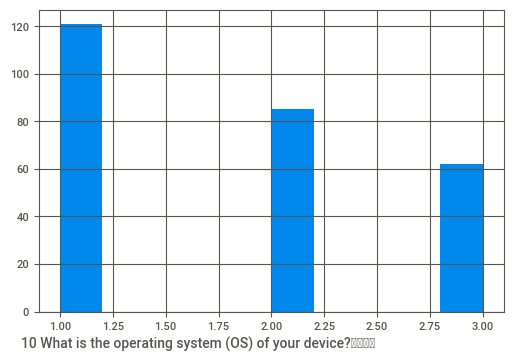

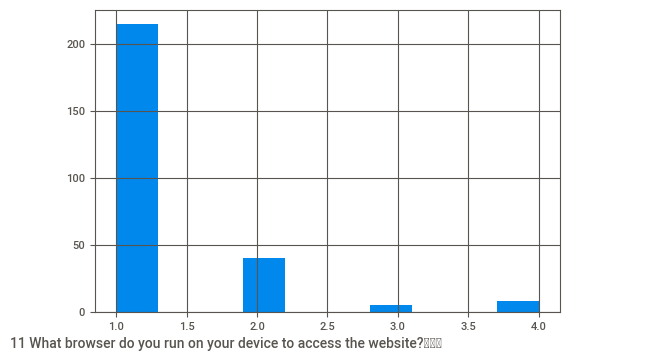

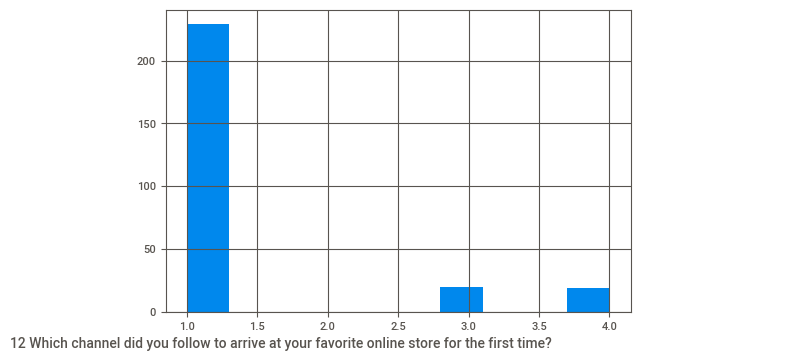

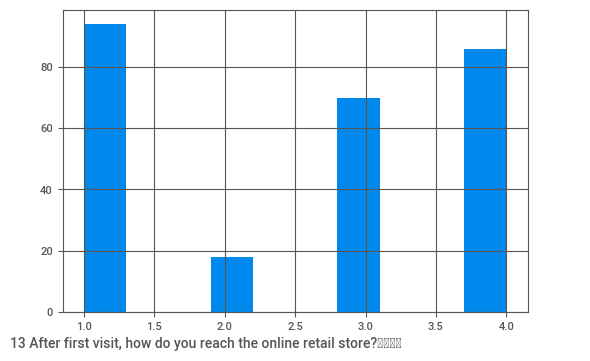

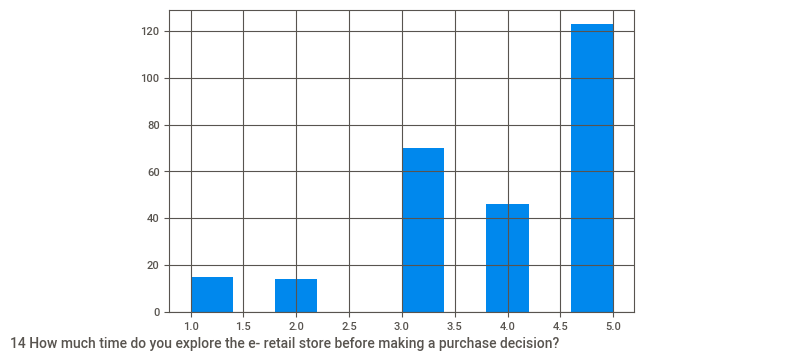

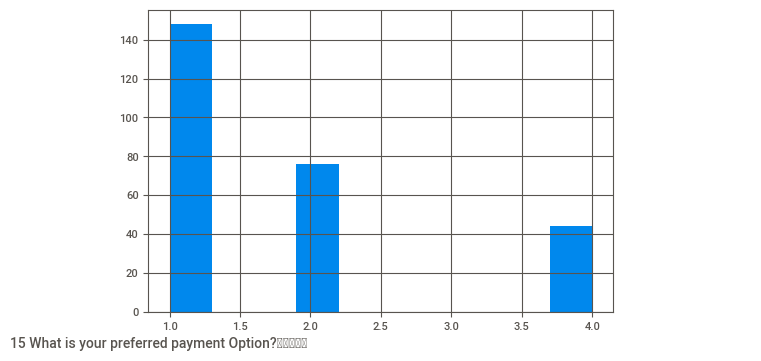

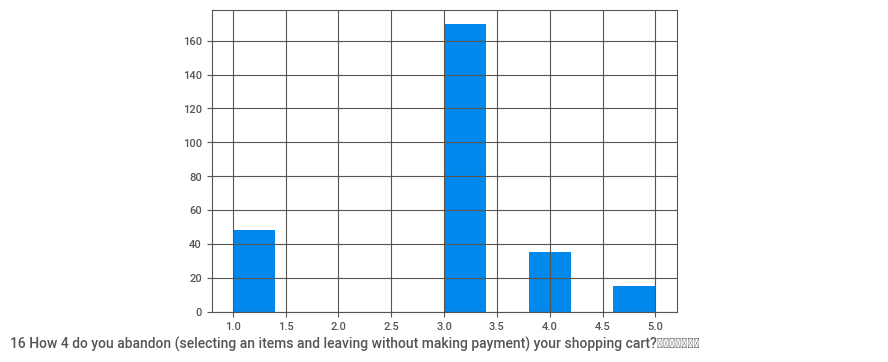

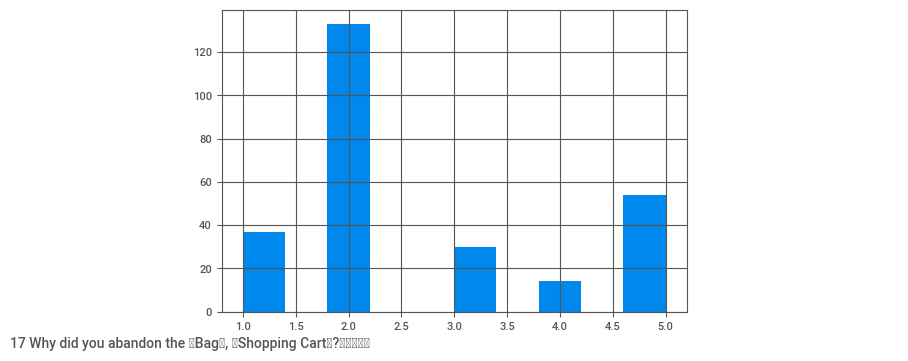

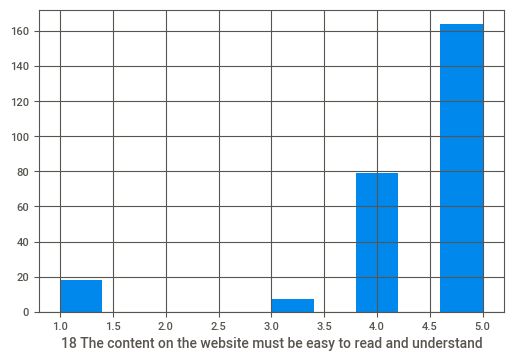

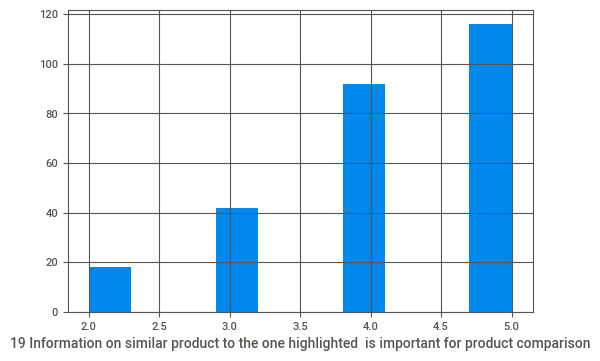

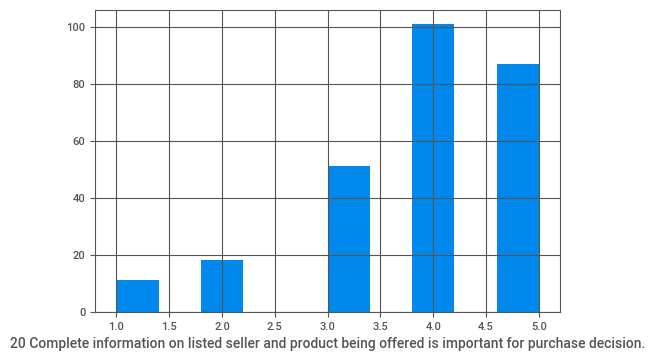

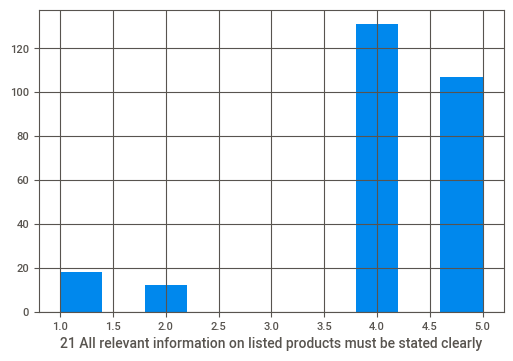

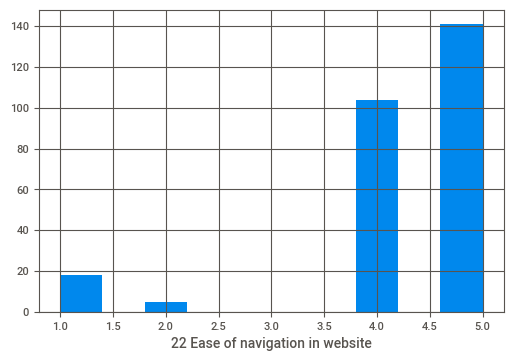

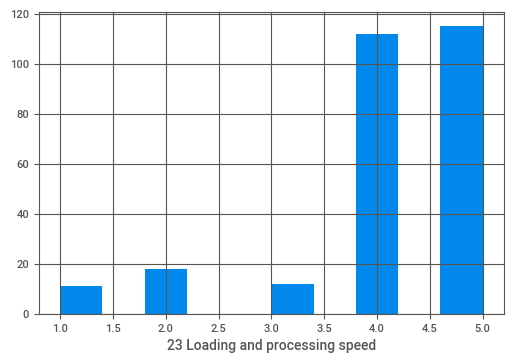

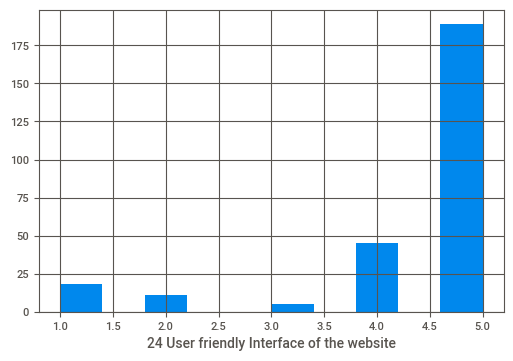

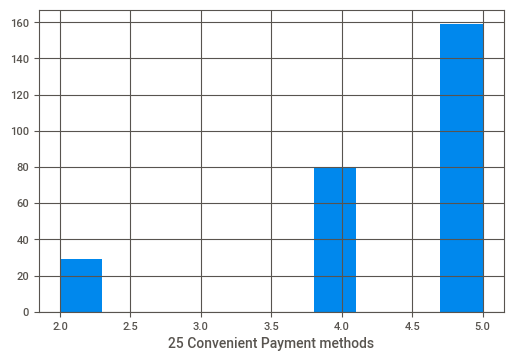

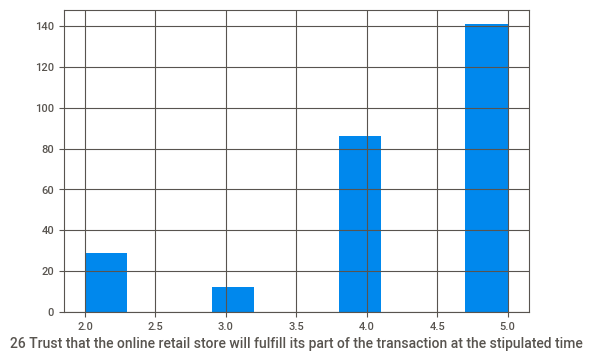

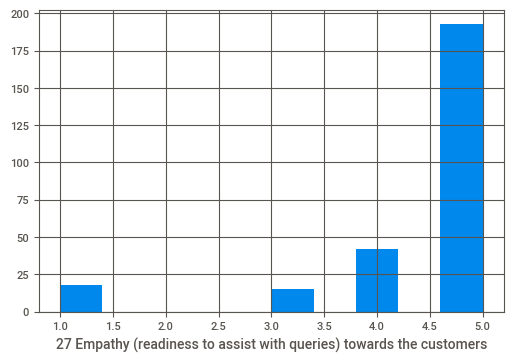

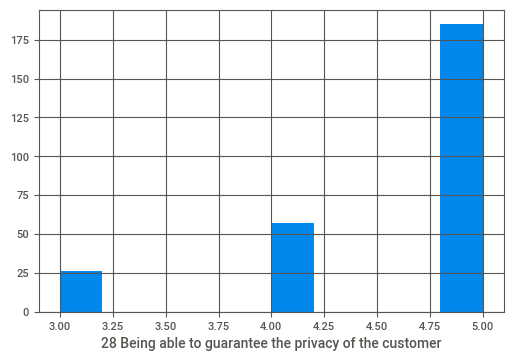

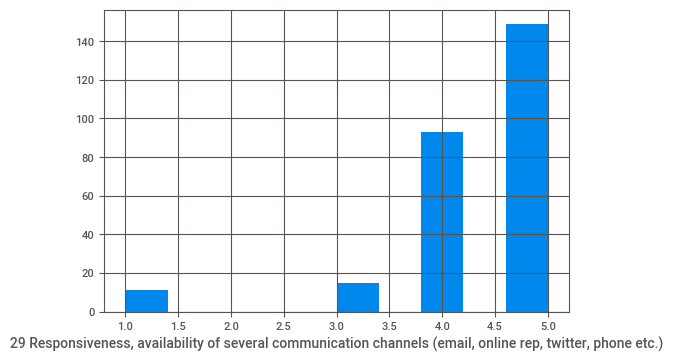

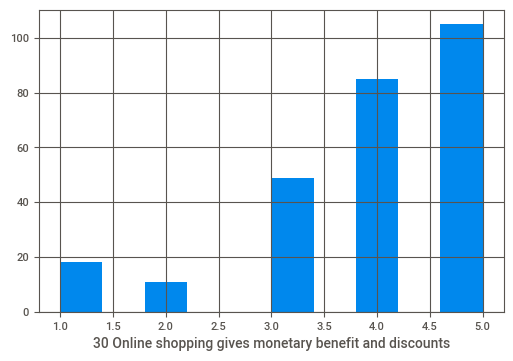

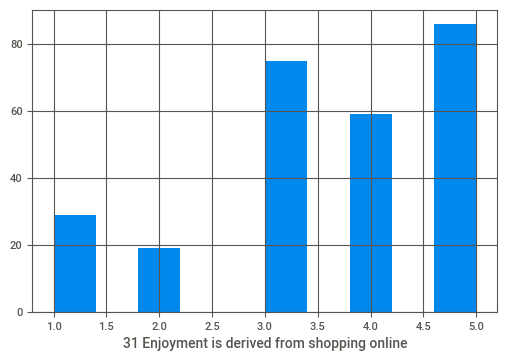

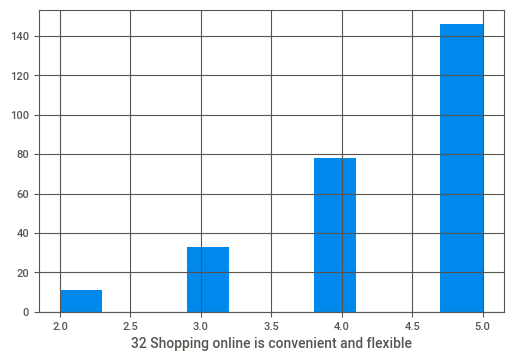

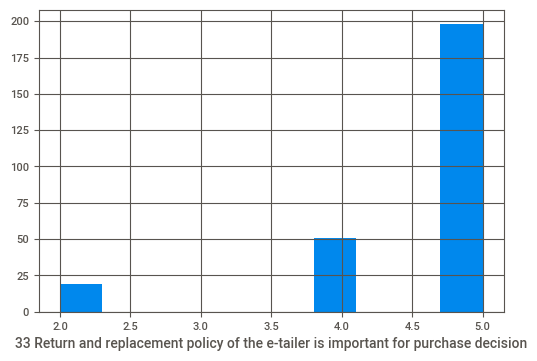

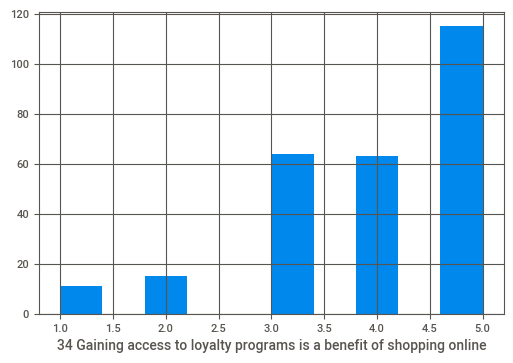

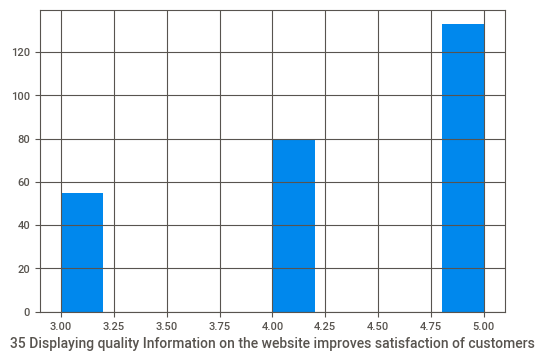

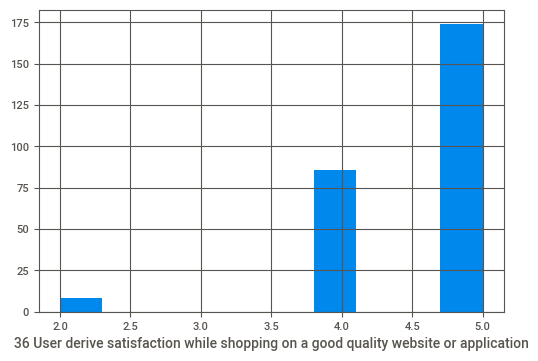

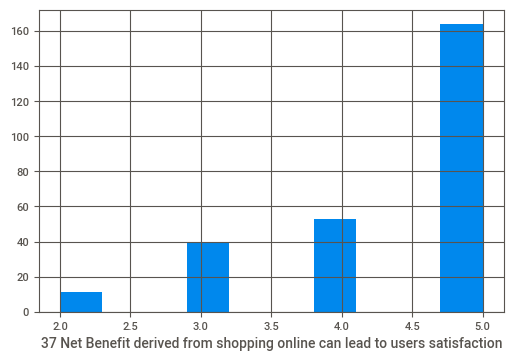

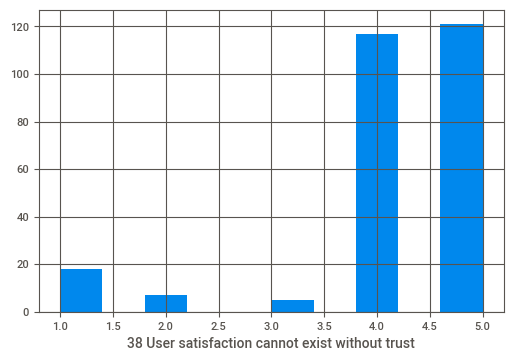

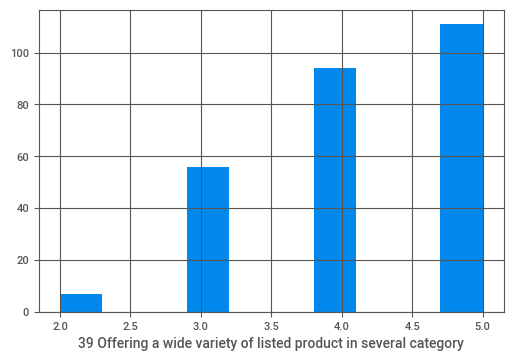

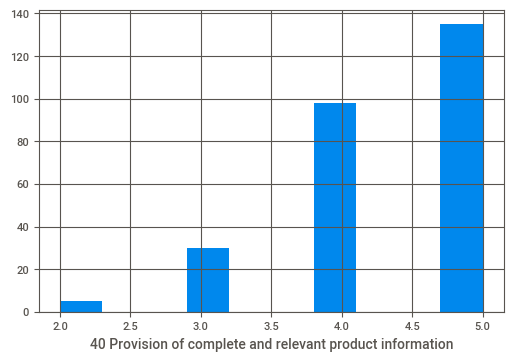

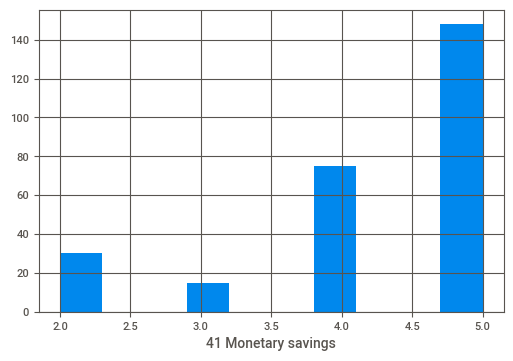

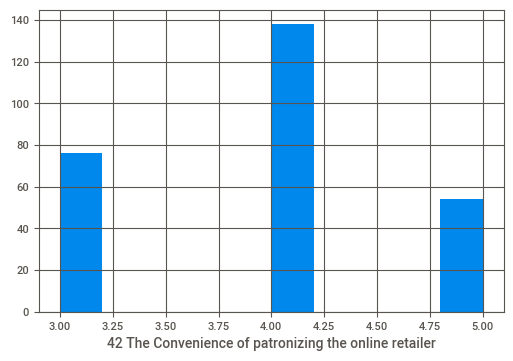

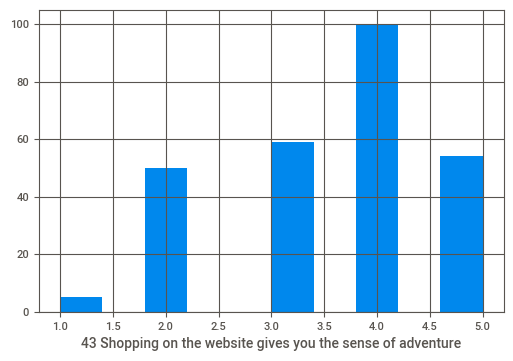

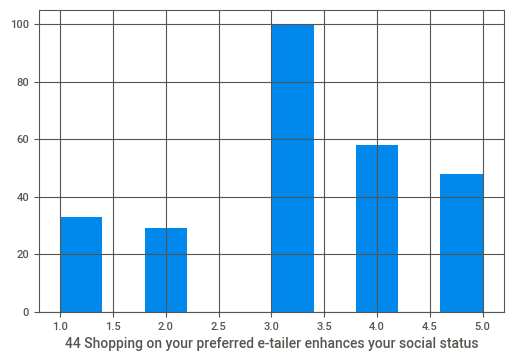

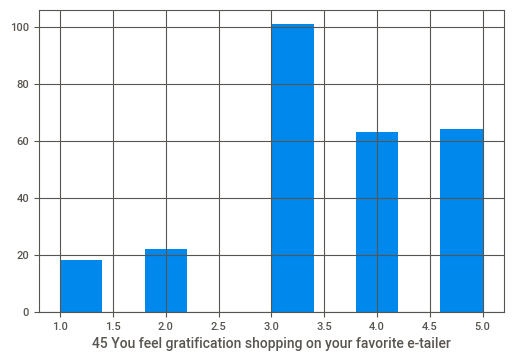

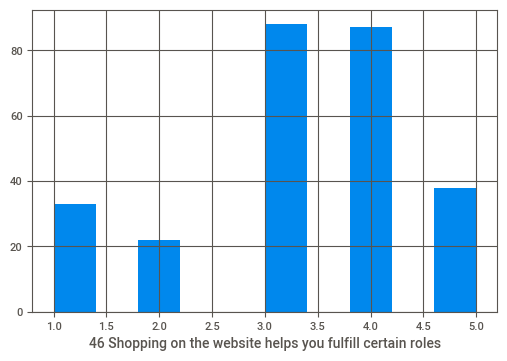

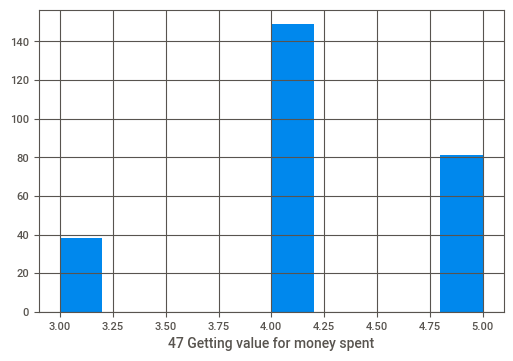

In [22]:
#checking for skewness
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    if feature==0:
        pass
    else:
    
        
        df[feature].hist()
        plt.xlabel(feature)
        plt.show()

# checking for outliers

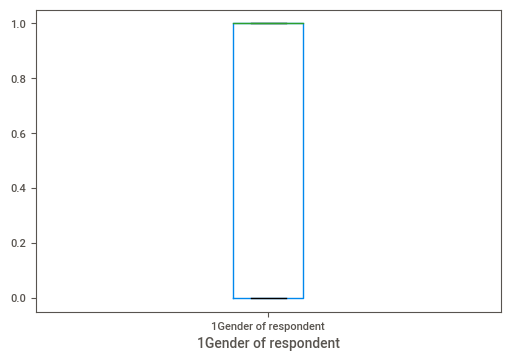

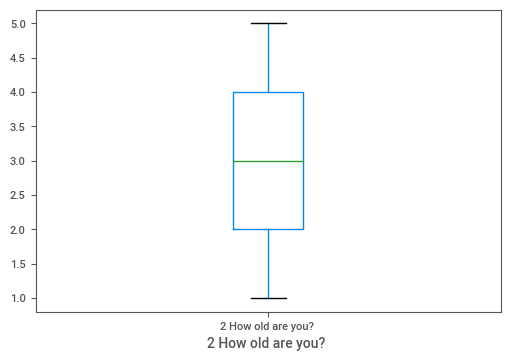

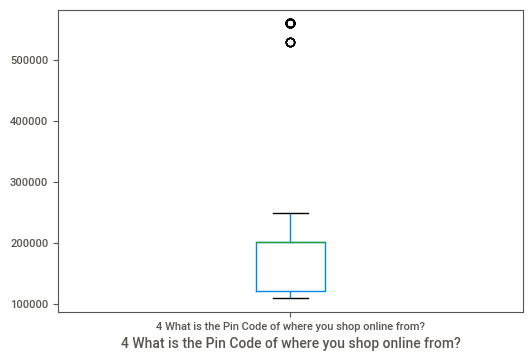

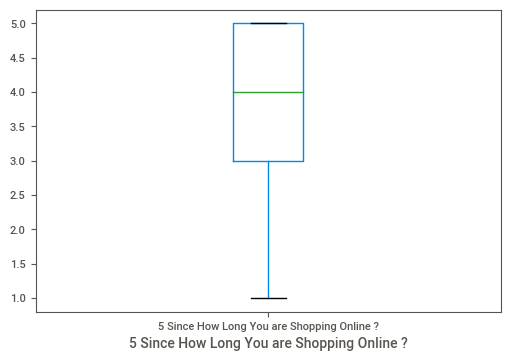

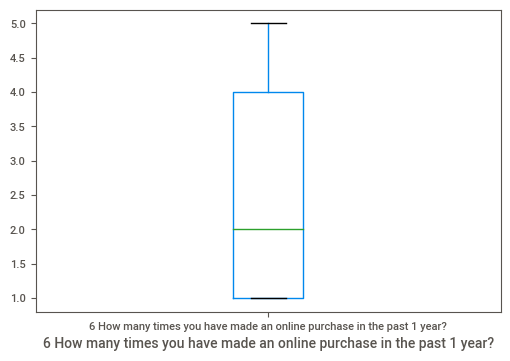

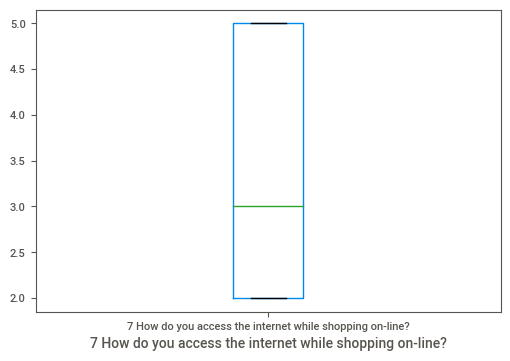

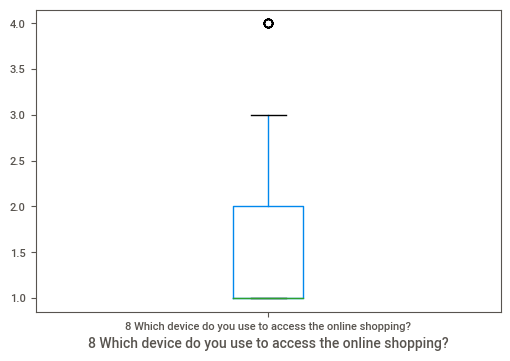

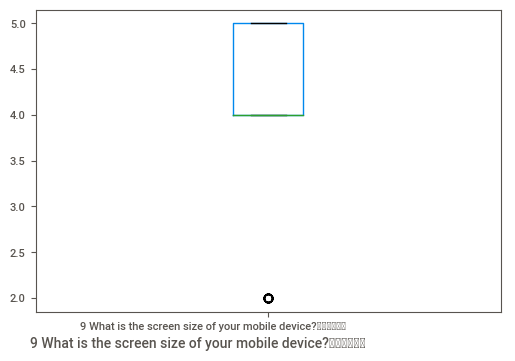

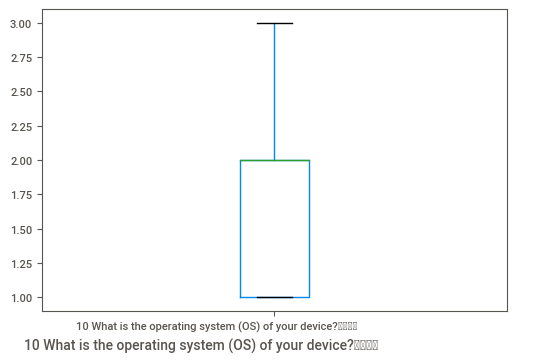

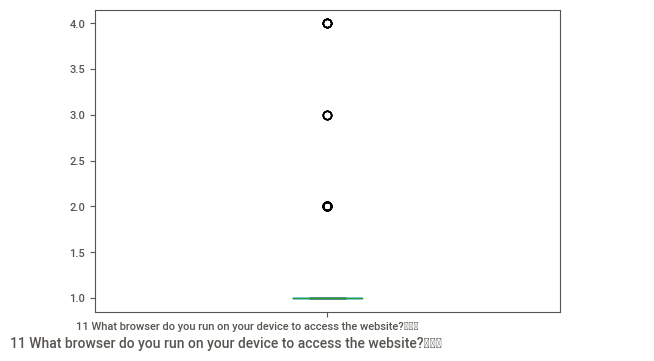

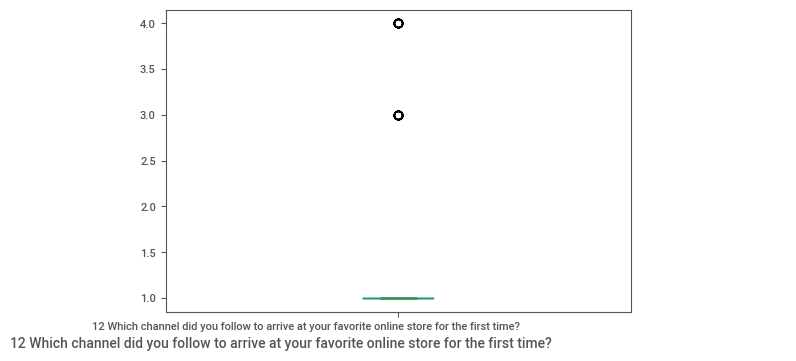

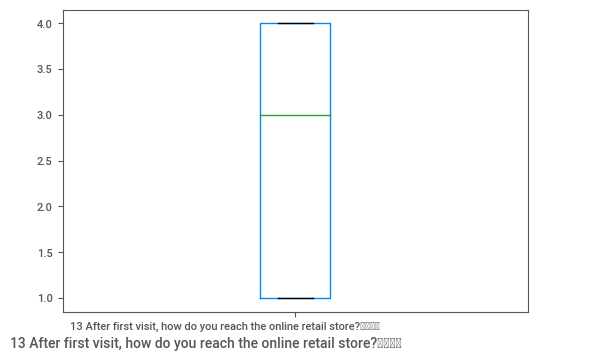

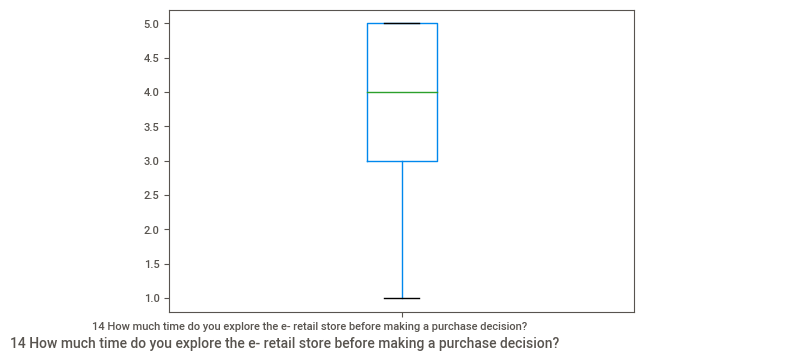

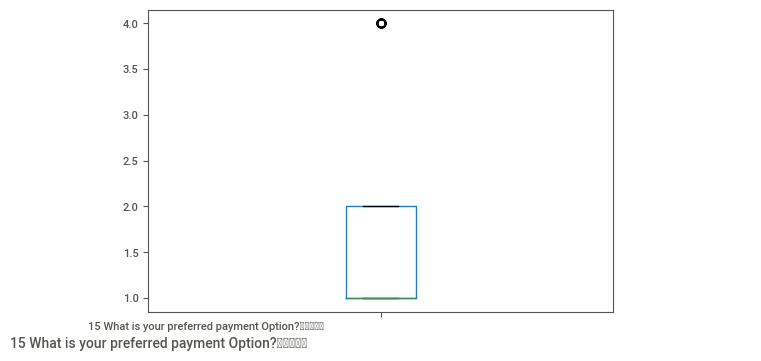

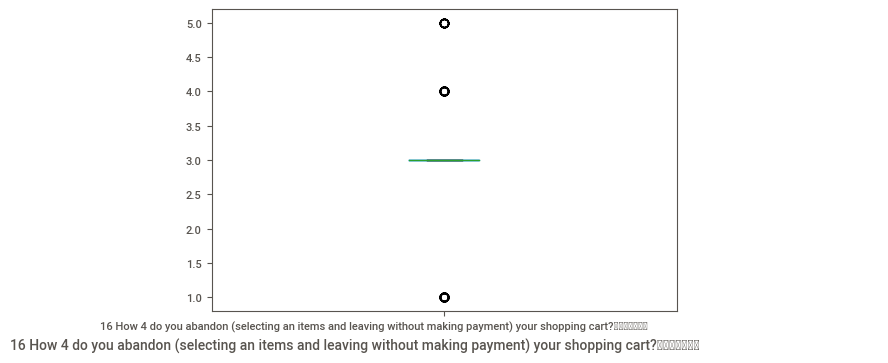

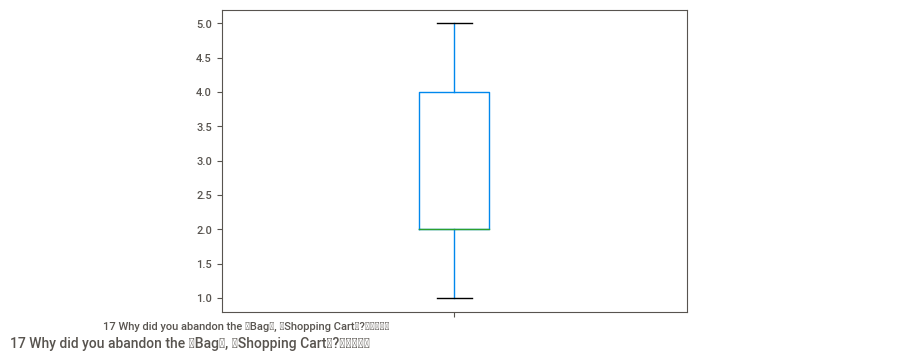

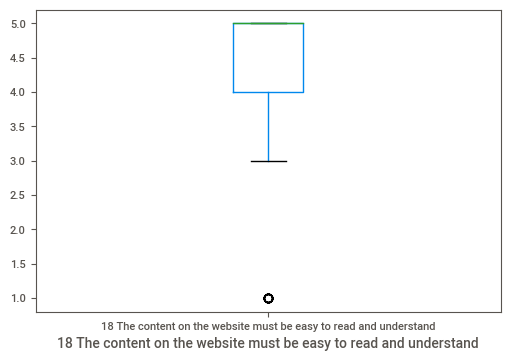

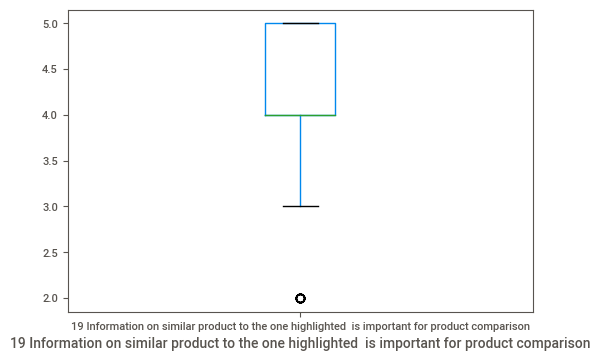

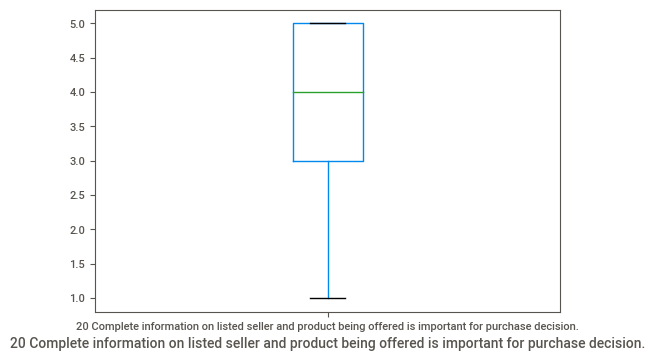

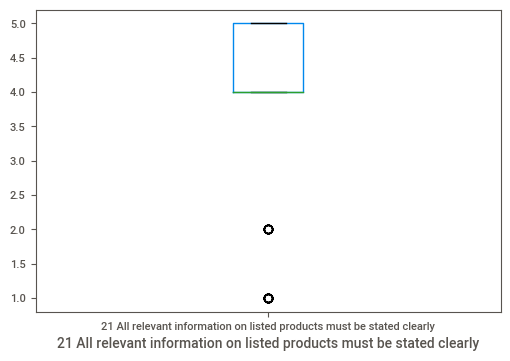

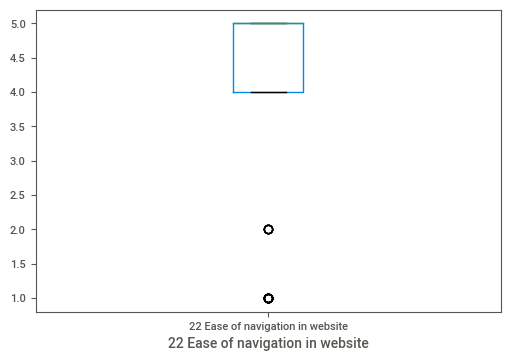

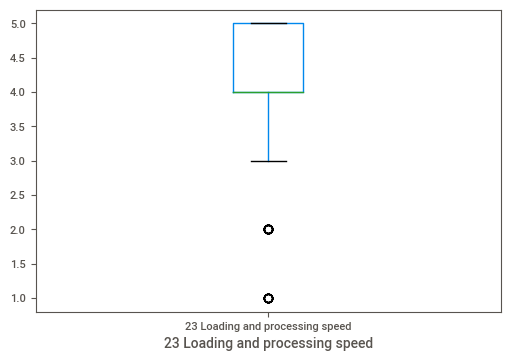

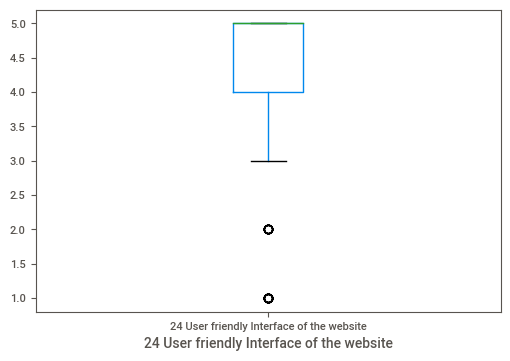

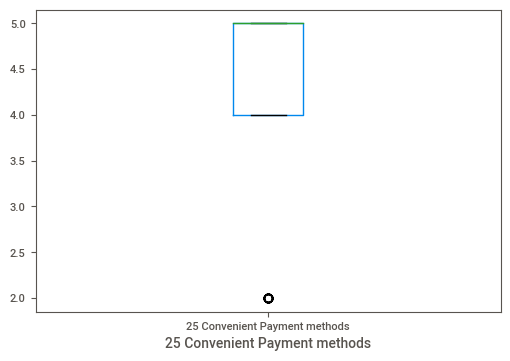

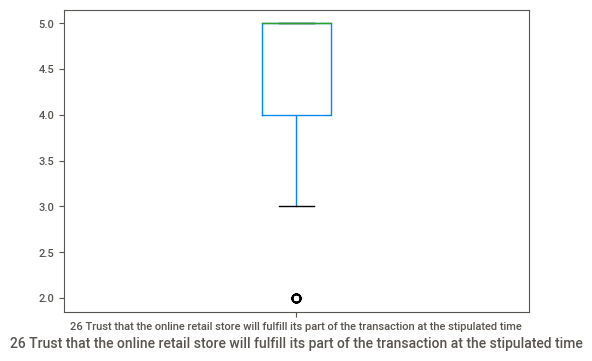

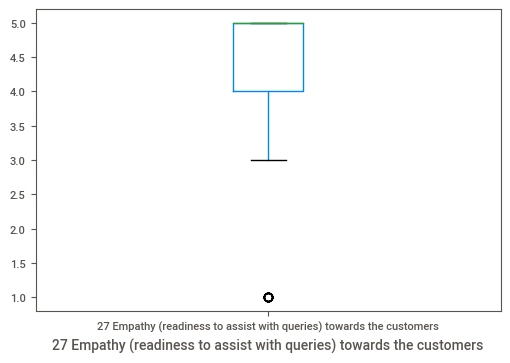

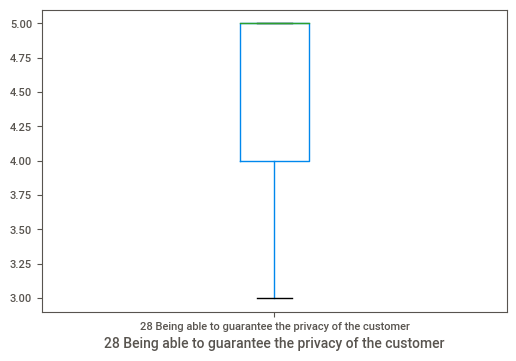

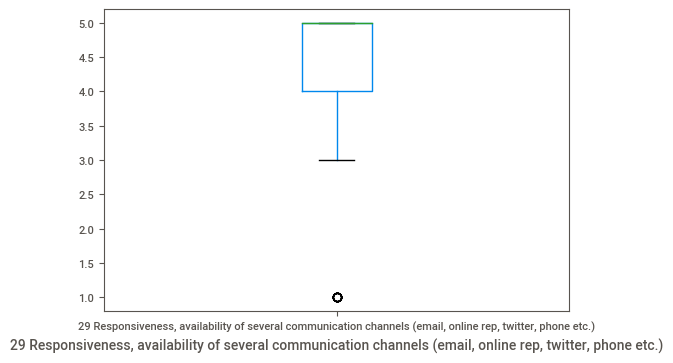

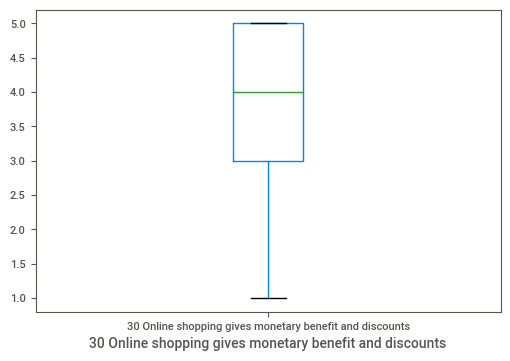

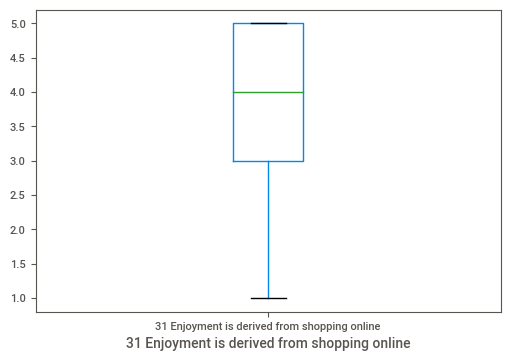

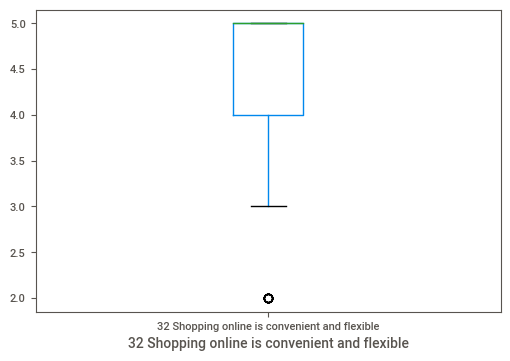

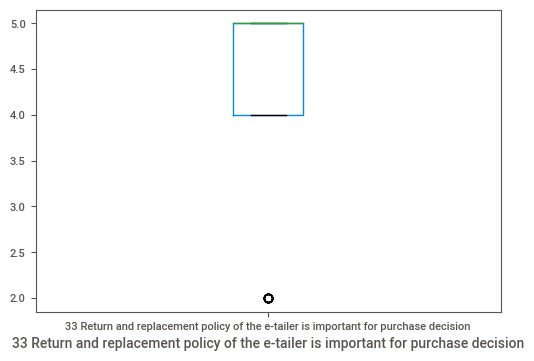

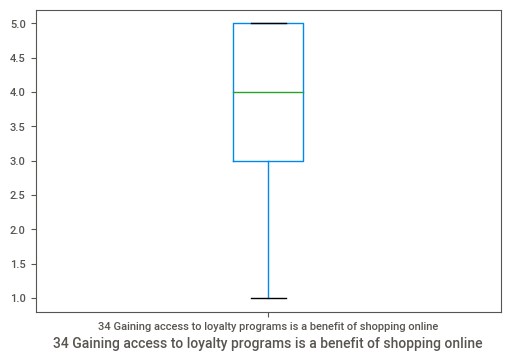

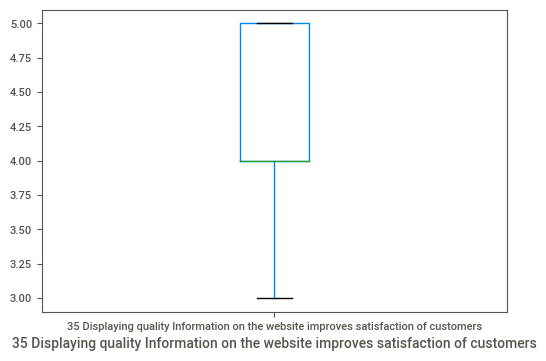

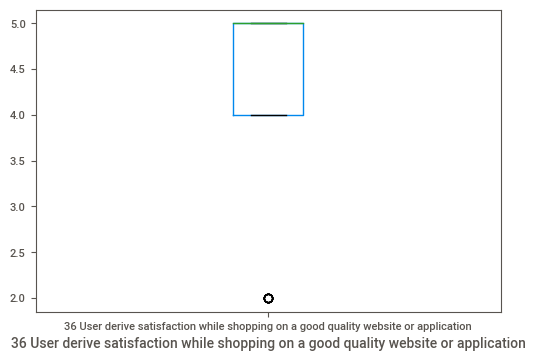

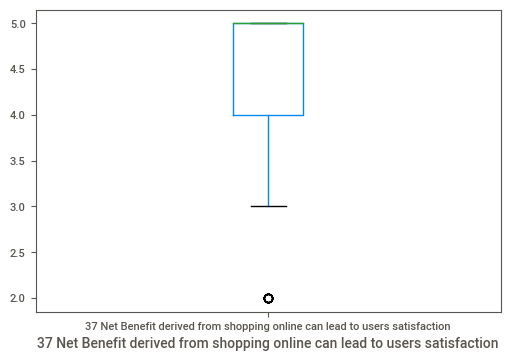

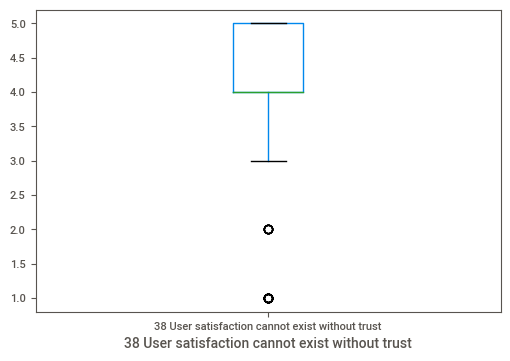

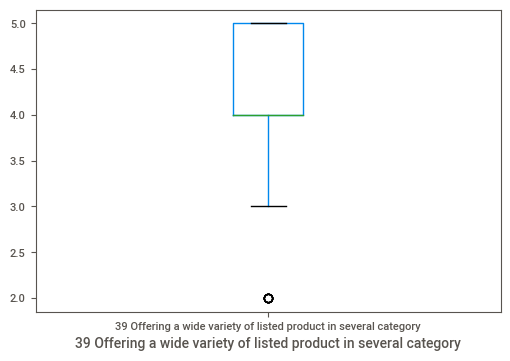

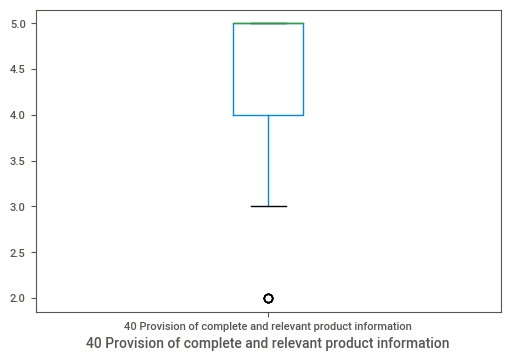

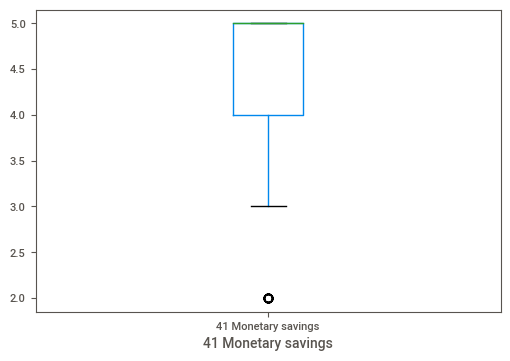

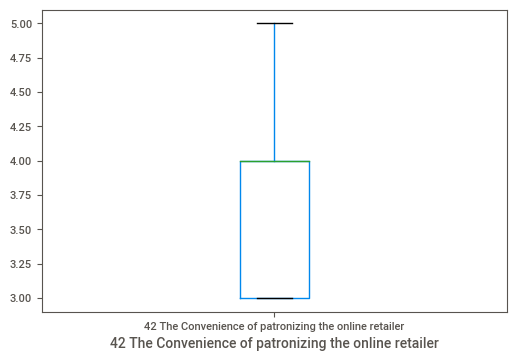

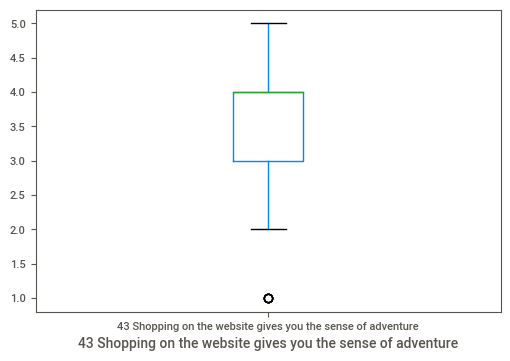

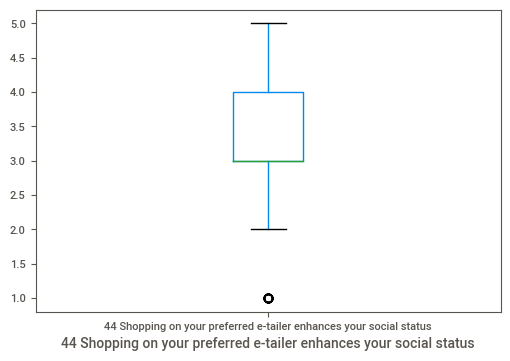

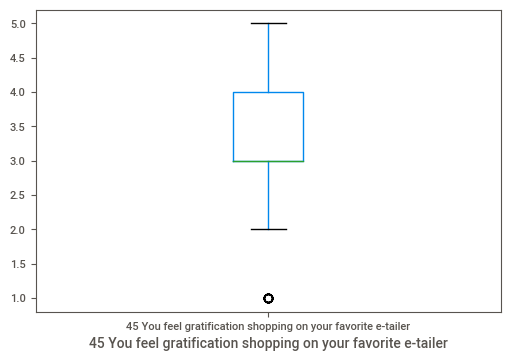

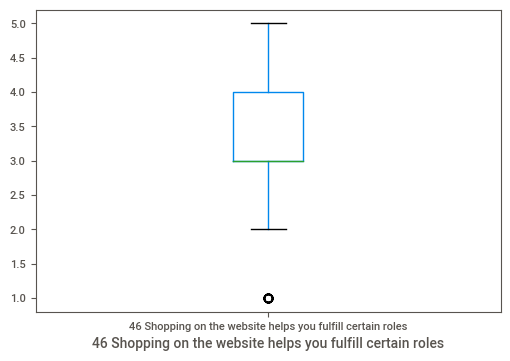

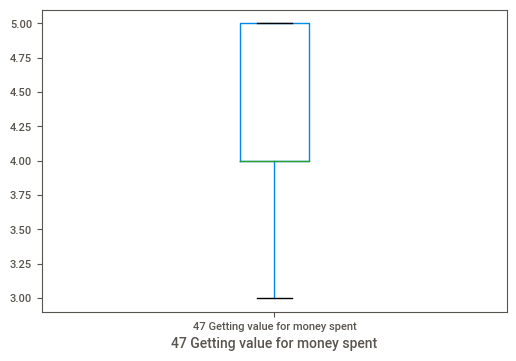

In [23]:
#checking for outliers

numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    if feature==0:
        pass
    else:
    
        df[feature].plot.box()
        plt.xlabel(feature)
        plt.show()

# checking if imbalanced dataset

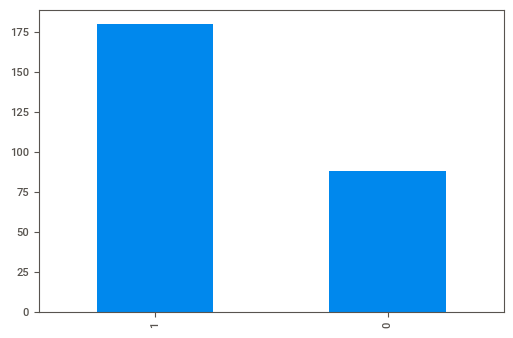

In [24]:
#Imbalanced dataset
df['1Gender of respondent'].value_counts().plot.bar()

In [25]:
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the Bag, Shopping Cart?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you 

# Label encoding by enumerate function where in a feature the priority is given to categories which are repeated maximum time.

In [26]:
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

In [27]:
categorical_features

['3 Which city do you shop online from?',
 'From the following, tick any (or all) of the online retailers you have shopped from                                                                    ',
 'Easy to use website or application',
 'Visual appealing web-page layout',
 'Wild variety of product on offer',
 'Complete, relevant description information of products',
 'Fast loading website speed of website and application',
 'Reliability of the website or application',
 'Quickness to complete purchase',
 'Availability of several payment options',
 'Speedy order delivery ',
 'Privacy of customers\x92 information',
 'Security of customer financial information',
 'Perceived Trustworthiness',
 'Presence of online assistance through multi-channel',
 'Longer time to get logged in (promotion, sales period)',
 'Longer time in displaying graphics and photos (promotion, sales period)',
 'Late declaration of price (promotion, sales period)',
 'Longer page loading time (promotion, sales period)',


In [28]:
for feature in categorical_features:
    labels_sorted=df[feature].value_counts().sort_values().index
   
    labels_ordered={k:i for i,k in enumerate(labels_sorted,0)}
    df[feature]=df[feature].map(labels_ordered) #.map({})

In [29]:
categorical_features

['3 Which city do you shop online from?',
 'From the following, tick any (or all) of the online retailers you have shopped from                                                                    ',
 'Easy to use website or application',
 'Visual appealing web-page layout',
 'Wild variety of product on offer',
 'Complete, relevant description information of products',
 'Fast loading website speed of website and application',
 'Reliability of the website or application',
 'Quickness to complete purchase',
 'Availability of several payment options',
 'Speedy order delivery ',
 'Privacy of customers\x92 information',
 'Security of customer financial information',
 'Perceived Trustworthiness',
 'Presence of online assistance through multi-channel',
 'Longer time to get logged in (promotion, sales period)',
 'Longer time in displaying graphics and photos (promotion, sales period)',
 'Late declaration of price (promotion, sales period)',
 'Longer page loading time (promotion, sales period)',


In [30]:
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the Bag, Shopping Cart?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you 

In [31]:
df.dtypes

1Gender of respondent                                                   int64
2 How old are you?                                                      int64
3 Which city do you shop online from?                                   int64
4 What is the Pin Code of where you shop online from?                   int64
5 Since How Long You are Shopping Online ?                              int64
                                                                        ...  
Longer delivery period                                                  int64
Change in website/Application design                                    int64
Frequent disruption when moving from one page to another                int64
Website is as efficient as before                                       int64
Which of the Indian online retailer would you recommend to a friend?    int64
Length: 71, dtype: object

In [32]:
df.dtypes=='O'

1Gender of respondent                                                   False
2 How old are you?                                                      False
3 Which city do you shop online from?                                   False
4 What is the Pin Code of where you shop online from?                   False
5 Since How Long You are Shopping Online ?                              False
                                                                        ...  
Longer delivery period                                                  False
Change in website/Application design                                    False
Frequent disruption when moving from one page to another                False
Website is as efficient as before                                       False
Which of the Indian online retailer would you recommend to a friend?    False
Length: 71, dtype: bool

# Separating target and independent variables

In [33]:
y=df['1Gender of respondent']
X=df.drop(['1Gender of respondent'],axis=1)

# Applying Log transformation to remove skewness

In [34]:
for col in X.columns:
    if X.skew().loc[col]>0.55:
        X[col]=np.log1p(X[col])
    

In [35]:
X.skew()

2 How old are you?                                                       0.063559
3 Which city do you shop online from?                                   -0.769088
4 What is the Pin Code of where you shop online from?                    0.999480
5 Since How Long You are Shopping Online ?                              -0.549489
6 How many times you have made an online purchase in the past 1 year?    0.235265
                                                                           ...   
Longer delivery period                                                  -0.538985
Change in website/Application design                                    -1.008735
Frequent disruption when moving from one page to another                -0.584991
Website is as efficient as before                                       -0.955178
Which of the Indian online retailer would you recommend to a friend?    -0.932447
Length: 70, dtype: float64

In [36]:
X.head()

,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the Bag, Shopping Cart?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?

# Scaling the Data

In [37]:
#Applying Standard scalar to independent variable only
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_scaled=ss.fit_transform(X)
x=pd.DataFrame(data=X_scaled,columns=X.columns)


In [41]:
x.head()

,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the Bag, Shopping Cart?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?

In [42]:
x.skew()

2 How old are you?                                                       0.063559
3 Which city do you shop online from?                                   -0.769088
4 What is the Pin Code of where you shop online from?                    0.999480
5 Since How Long You are Shopping Online ?                              -0.549489
6 How many times you have made an online purchase in the past 1 year?    0.235265
                                                                           ...   
Longer delivery period                                                  -0.538985
Change in website/Application design                                    -1.008735
Frequent disruption when moving from one page to another                -0.584991
Website is as efficient as before                                       -0.955178
Which of the Indian online retailer would you recommend to a friend?    -0.932447
Length: 70, dtype: float64

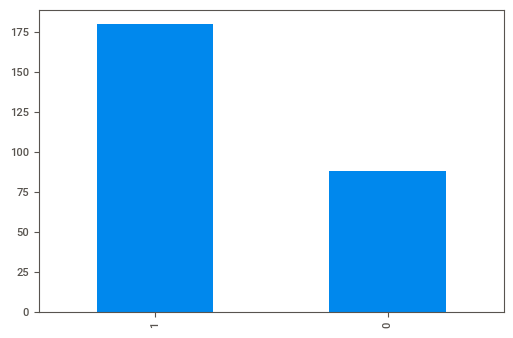

In [43]:
#Imbalanced dataset
df['1Gender of respondent'].value_counts().plot.bar()

# Over sampling technique to balance the data


In [44]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=42)
x_ovrsampled,y_oversampled=ros.fit_sample(x,y)

In [46]:
x.shape,x_ovrsampled.shape

((268, 70), (360, 70))

In [47]:
y.shape,y_oversampled.shape

((268,), (360,))

In [48]:
x_ovrsampled.shape[0]-x.shape[0] #Exta rows added due to oversampling technique.

92

In [49]:
y_oversampled

0      1
1      1
2      0
3      1
4      1
      ..
355    0
356    0
357    0
358    0
359    0
Name: 1Gender of respondent, Length: 360, dtype: int64

# Model Building

In [50]:
x=x_ovrsampled
y=y_oversampled

In [51]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,stratify=y)

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [53]:
knn=KNeighborsClassifier()
svc=SVC()
lr=LogisticRegression()
dt=DecisionTreeClassifier()
gnb=GaussianNB()
rfc=RandomForestClassifier()
xgb=XGBClassifier()
gbc=GradientBoostingClassifier()
ada=AdaBoostClassifier()

In [54]:
models=[]
models.append(('KNeighborsClassifier',knn))
models.append(('SVC',svc))
models.append(('LogisticRegression',lr))
models.append(('DecisionTreeClassifier',dt))
models.append(('GaussianNB',gnb))
models.append(('RandomForestClassifier',rfc))
models.append(('XGBClassifier',xgb))
models.append(('GradientBoostingClassifier',gbc))
models.append(('AdaBoostClassifier',ada))

In [55]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,recall_score

***************** KNeighborsClassifier *******************


KNeighborsClassifier()


Accuracy_score  - 0.9111111111111111


cross_val_score  - 0.913888888888889


classification report
               precision    recall  f1-score   support

           0       0.88      0.96      0.91        45
           1       0.95      0.87      0.91        45

    accuracy                           0.91        90
   macro avg       0.91      0.91      0.91        90
weighted avg       0.91      0.91      0.91        90



[[43  2]
 [ 6 39]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)
***************** SVC *******************


SVC()


Accuracy_score  - 0.9222222222222223


cross_val_score  - 0.875


classification report
               precision    recall  f1-score   support

           0       0.93      0.91      0.92        45
           1       0.91      0.93      0.92        45

    accuracy                           0.92        90
   macro avg       0.92      0.92      0.92        90
weighte

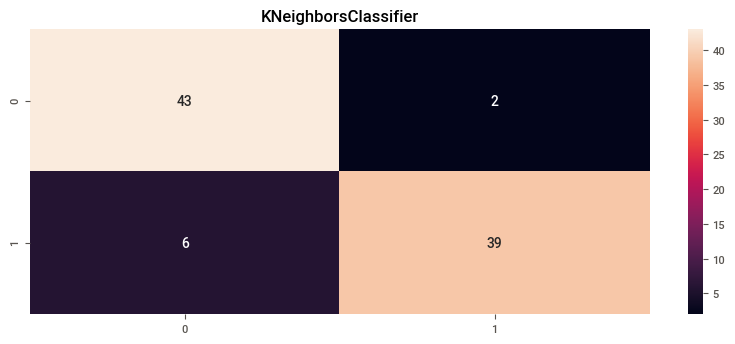

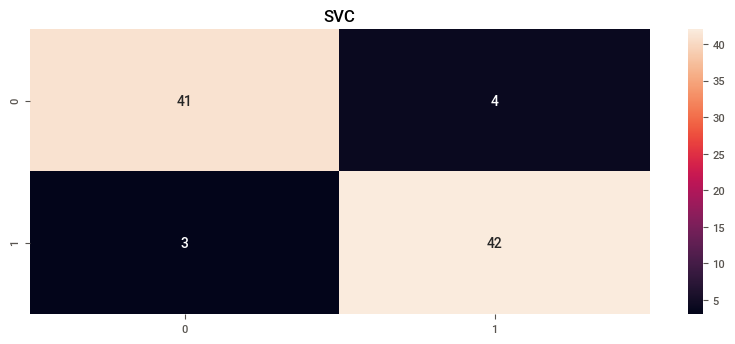

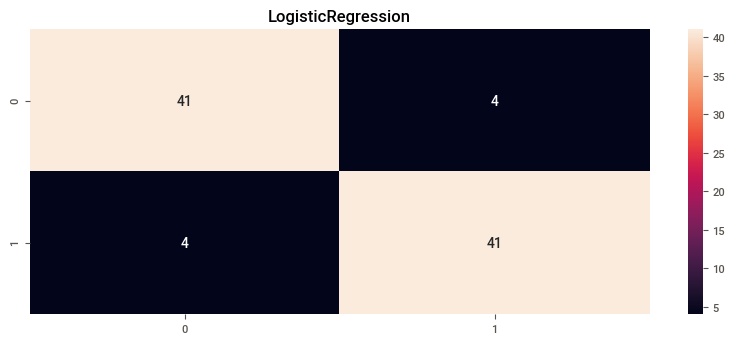

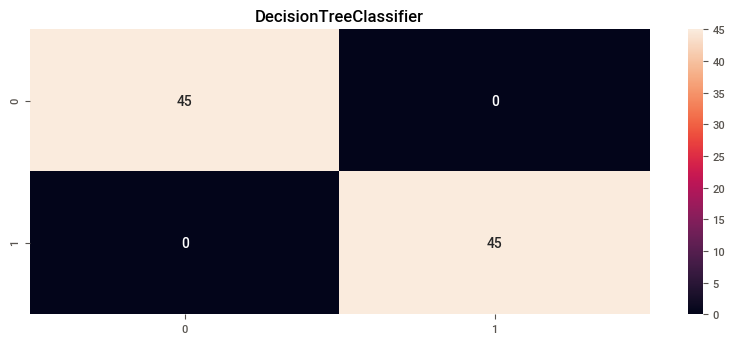

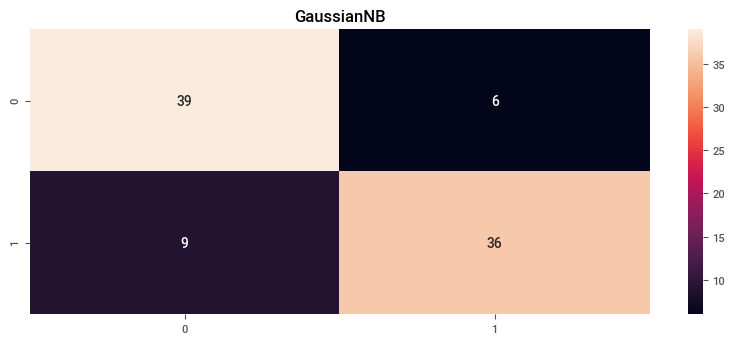

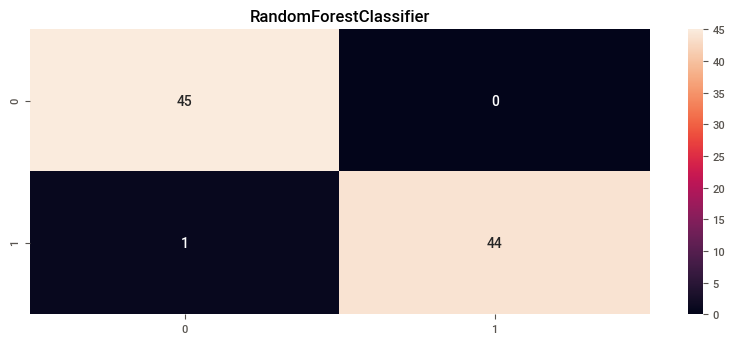

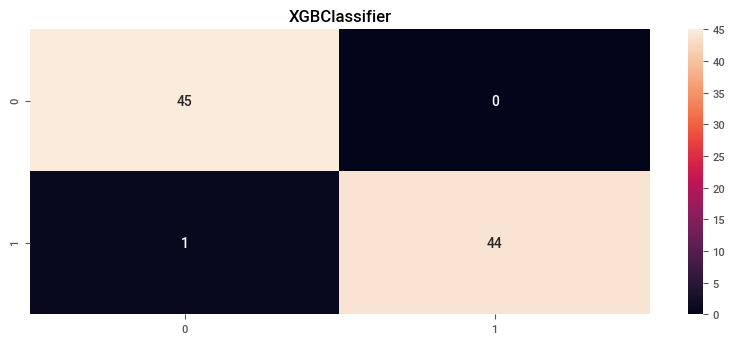

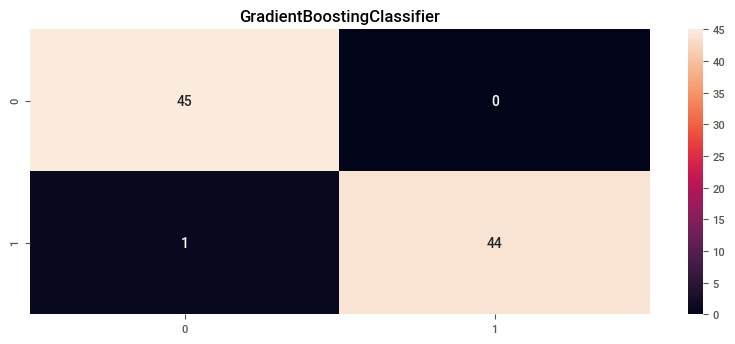

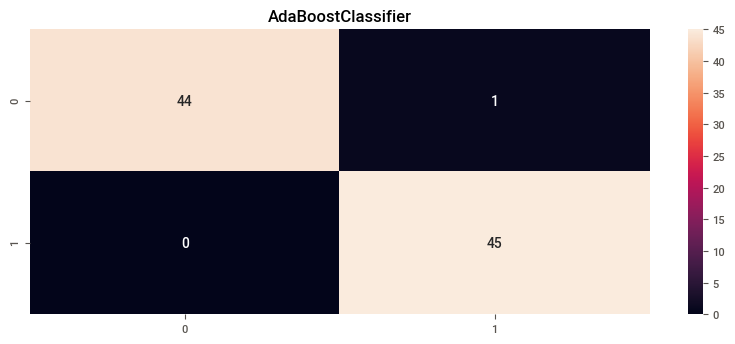

In [56]:
Model=[]
score=[]
cv=[]

for name,model in models:
    print('*****************',name,'*******************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score  -',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('cross_val_score  -',sc)
    cv.append(sc*100)
    print('\n')
        
    print('classification report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    
    

In [57]:
result=pd.DataFrame({'Model':Model,'Accuracy_score':score,'Cross_val_score':cv})
result

,Model,Accuracy_score,Cross_val_score
0,KNeighborsClassifier,91.111111,91.388889
1,SVC,92.222222,87.500000
2,LogisticRegression,91.111111,88.333333
3,DecisionTreeClassifier,100.000000,96.944444
4,GaussianNB,83.333333,76.944444
5,RandomForestClassifier,98.888889,96.111111
6,XGBClassifier,98.888889,97.222222
7,GradientBoostingClassifier,98.888889,97.500000
8,AdaBoostClassifier,98.888889,96.944444


In [53]:
#We can see from the table DecisionTreeClassifier is the best performing Algorithm.

In [54]:
#We will apply Gridsearchcv to the top performing models.

In [55]:
#Now lets calculate the random state of the models at which they perform the best.

# Finding the best random_state 

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,recall_score
from sklearn.linear_model import LogisticRegression
def maxaccuracy_score(model,x,y):
    max_accuracy=0
    for r_state in range(42,101):
        
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,stratify=y)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        score=accuracy_score(y_test,pred)
        
        if score>max_accuracy:
            max_accuracy=score
            final_r_state=r_state
    print('max_accuracy_score is at random_state  ',final_r_state,'  which is  ',max_accuracy)
    return final_r_state

In [59]:
x.shape,y.shape

((360, 70), (360,))

In [60]:
print('knn',maxaccuracy_score(knn,x,y))
print('svc',maxaccuracy_score(svc,x,y))
print('lr',maxaccuracy_score(lr,x,y))
print('dt',maxaccuracy_score(dt,x,y))
print('gnb',maxaccuracy_score(gnb,x,y))
print('rfc',maxaccuracy_score(rfc,x,y))
print('xgb',maxaccuracy_score(xgb,x,y))
print('gbc',maxaccuracy_score(gbc,x,y))
print('ada',maxaccuracy_score(ada,x,y))

max_accuracy_score is at random_state   48   which is   0.9333333333333333
knn 48
max_accuracy_score is at random_state   65   which is   0.9555555555555556
svc 65
max_accuracy_score is at random_state   73   which is   0.9444444444444444
lr 73
max_accuracy_score is at random_state   42   which is   1.0
dt 42
max_accuracy_score is at random_state   51   which is   0.8666666666666667
gnb 51
max_accuracy_score is at random_state   65   which is   1.0
rfc 65
max_accuracy_score is at random_state   65   which is   1.0
xgb 65
max_accuracy_score is at random_state   65   which is   1.0
gbc 65
max_accuracy_score is at random_state   58   which is   1.0
ada 58


# GridsearchCV

# DecisionTreeClassifier(random_state=42)=100%

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,stratify=y)
dt=DecisionTreeClassifier()

In [65]:
parameters=[{'criterion':['gini','entropy'],'max_depth':[5,7,9,10],'min_samples_leaf':[1,2]}]
grid_search=GridSearchCV(dt,parameters,scoring='accuracy',n_jobs=-1,cv=3)
grid_search=grid_search.fit(x,y)
grid_search.best_params_ 

{'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 1}

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)
dt=DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf= 1)
dt.fit(x,y)
pred_dt=dt.predict(x_test)
score=accuracy_score(y_test,pred_dt)
print('Accuracy=  ',accuracy_score(y_test,pred_dt))

Accuracy=   0.9888888888888889


In [67]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
dt=DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf= 1)
cvs=cross_val_score(dt,x,y,scoring='accuracy',cv=3)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(dt,x,y,cv=3)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.975


array([[178,   8],
       [  2, 172]], dtype=int64)

# model2->XGBClassifier(random_state=65)=100%

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=65)
xgb=XGBClassifier()

In [69]:
from sklearn.model_selection import GridSearchCV
parameters=[{'learning_rate':[0.1,0.2,0.3,0.4],'max_depth':[3,4,5,6,7,8],'colsample_bytree':[0.5,0.6,0.7,0.8,0.9]}]
            
gscv=GridSearchCV(xgb,parameters,scoring='accuracy',n_jobs=-1,cv=3)
grid_search=gscv.fit(x,y)
grid_search.best_params_

{'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 3}

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=71)
xgb=XGBClassifier(colsample_bytree=0.5, learning_rate=0.1, max_depth=3)
xgb.fit(x,y)
pred=xgb.predict(x_test)
print('Accuracy=  ',accuracy_score(y_test,pred))

Accuracy=   0.9888888888888889


In [71]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
xgb=XGBClassifier(colsample_bytree=0.5, learning_rate=0.1, max_depth=3)
cvs=cross_val_score(xgb,x,y,scoring='accuracy',cv=3)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(xgb,x,y,cv=3)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.975


array([[178,   7],
       [  2, 173]], dtype=int64)

# model3->GradientBoostingClassifier(random_state=65)=100%

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)
gbc=GradientBoostingClassifier()

In [72]:
parameters=[{'max_depth':[5,7,9,10],'min_samples_leaf':[1,2],'n_estimators':[100,250,500]}]
            
grid_search=GridSearchCV(gbc,parameters,scoring='accuracy',n_jobs=-1,cv=3)
grid_search=grid_search.fit(x,y)
grid_search.best_params_ 

{'max_depth': 7, 'min_samples_leaf': 1, 'n_estimators': 250}

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=45)
rfc=RandomForestClassifier(min_samples_leaf=1,max_depth=7,n_estimators=250)
rfc.fit(x,y)
pred=rfc.predict(x_test)
print('Accuracy=  ',accuracy_score(y_test,pred))

Accuracy=   0.9777777777777777


In [74]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
rfc=RandomForestClassifier(min_samples_leaf=1,max_depth=7,n_estimators=250)
cvs=cross_val_score(rfc,x,y,scoring='accuracy',cv=3)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(rfc,x,y,cv=3)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.9527777777777778


array([[174,   8],
       [  6, 172]], dtype=int64)

# Saving the final XGBClassifier model

In [76]:
#From all the model tried above XGBClassifier model cross_val_score is good.
#corresponding random_state=65
#Hence saving the final model as XGBClassifier model.
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=65)
xgb=XGBClassifier(colsample_bytree=0.5, learning_rate=0.1, max_depth=3)
xgb.fit(x,y)
pred=xgb.predict(x_test)
print('Accuracy=  ',accuracy_score(y_test,pred))

Accuracy=   1.0


In [78]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
xgb=XGBClassifier(colsample_bytree=0.5, learning_rate=0.1, max_depth=3)
cvs=cross_val_score(rfc,x,y,scoring='accuracy',cv=3)
xgb.fit(x,y)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(xgb,x,y,cv=5)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.9555555555555556


array([[176,   6],
       [  4, 174]], dtype=int64)

In [79]:
import joblib
joblib.dump(xgb,'Customer retention problem project-xgb.obj')

['Customer retention problem project-xgb.obj']

In [80]:
model=joblib.load('Customer retention problem project-xgb.obj')

In [81]:
Final_predictions=model.predict(x_test)
Final_predictions=pd.DataFrame(Final_predictions,columns=['1Gender of respondent'])
Final_predictions[:5]

,1Gender of respondent
0,1
1,1
2,0
3,1
4,1


# Saving final predictions in file.csv format

In [82]:
Final_predictions.to_csv('E:\\final_predictions_Customer_retention_project',index=False)

# Conclusion:-